<a href="https://colab.research.google.com/github/Pramathesh1/Capstone-1-Global_Terrorism_Analysis/blob/main/Team_Colab_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
# importing relevant libraries
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap
from IPython.display import display, HTML
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# to import geopandas module
!apt install libspatialindex-dev
!pip install rtree
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 20 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 0s (4,256 kB/s)
Selecting previously unselected package libspatialind

In [3]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# loading the data into pandas dataframe
file_location = '/content/drive/MyDrive/Colab Notebooks/Almabetter/EDA Capstone Project/Global Terrorism Data.csv'
original_df = pd.read_csv(file_location, encoding='latin-1')

# Preliminary data exploration

Before starting, checking how many rows and columns this dataset has.

In [5]:
# dataset dimensions
original_df.shape

(181691, 135)

It has 1,81,691 rows and 135 columns.

Checking the top 5 rows and last 5 rows using head() and tail() methods.

In [6]:
# setting max column display settings to 135 to see all columnn
pd.options.display.max_columns = 135
original_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [7]:
original_df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0

In [8]:
# print all column names to make data dictionary
original_df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

### Data Dictionary

Following shows the column name from the dataset and what it stands for.

```
Columns which are used in this project.
'eventid'          : Serial number of particular incident, useful to keep count of incidents
'iyear'            : year of the incident
'imonth'           : month of the incident
'iday'             : day of the incident
'country_txt'      : country in which the incident occurred
'region_txt'       : region in which the incident occurred
'provstate'        : state or province of the country in which the incident occurred  
'summary'          : summary of the incident, when available
'alternative_txt'  : type of attack if it was not terrorist for certain
'suicide'          : did the incident involve a suicide attack?
'attacktype1_txt'  : general method of attack used (i.e. assassination, hijacking, bombing/explosion, etc.)
'targtype1_txt'    : general type of target/victim (i.e. business, government, police, military, etc.)
'gname'            : terrorist group responsible for the attack
'target1'          : specific person, building, installation, etc. that was targeted
'nkill'            : number of dead 
'nwound'           : number of wounded
'property'         : was property damaged during the attack?
'propextent_txt'   : type of property damage (major, minor or catastrophic in terms of monetary value)
'latitude'         : latitude of the incident
'longitude'        : longitude of the incident

Other column names which won't be used in the project.
'crit1'            : was the attack aimed at attaining a political, economic, religious, or social goal?
'crit2'            : was there intent to coerce or intimidate a larger audience than the victims?
'crit3'            : was the incident outside legitimate warfare activities (i.e. target non-combattants)?
'doubtter'         : was there doubt as to whether or not the incident is a terrorist attack
'extended'         : has the incident lasted for more than 24 hours?
'multiple'         : is the incident connected to other attacks?
'success'          : did the terrorist attack achieve its goal (i.e. assassination, etc.)?
'guncertain1'      : was the terrorist group confirmed?
'claimed'          : was the incident claimed by a particular group?
'ishostkid'        : were victims taken hostages or kidnapped?
'natlty1_txt'      : nationality of the target/victim
'weaptype1_txt'    : general type of weapon used in the incident (i.e. biological, chemical, firearms, etc.)

```



In [9]:
original_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

In [10]:
# setting max column for info() method to profile
pd.options.display.max_info_columns = 135
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Non-Null Count   Dtype  
---   ------              --------------   -----  
 0    eventid             181691 non-null  int64  
 1    iyear               181691 non-null  int64  
 2    imonth              181691 non-null  int64  
 3    iday                181691 non-null  int64  
 4    approxdate          9239 non-null    object 
 5    extended            181691 non-null  int64  
 6    resolution          2220 non-null    object 
 7    country             181691 non-null  int64  
 8    country_txt         181691 non-null  object 
 9    region              181691 non-null  int64  
 10   region_txt          181691 non-null  object 
 11   provstate           181270 non-null  object 
 12   city                181257 non-null  object 
 13   latitude            177135 non-null  float64
 14   longitude           177134 non-null  float64
 15   specificity    

In [11]:
# check number of null values in each column
original_df.isna().sum().to_frame().T

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,0,0,0,0,172452,0,179471,0,0,0,0,421,434,4556,4557,6,0,126196,66129,0,0,0,1,152680,152680,1,0,0,0,0,175377,175377,181263,181263,0,0,10373,10373,42550,636,1559,1559,170547,170547,171006,171006,171574,170671,170863,170863,180515,180515,180594,180594,180665,180516,180544,180544,0,175801,179678,181531,181367,181671,131130,380,179736,181371,0,71115,69489,66120,162608,162608,179801,181075,181075,181373,181558,181558,176852,0,0,20768,20768,168564,168564,170149,170149,179828,179828,179998,179998,181618,181618,181621,181621,67670,10313,64446,66958,16311,64702,69143,0,117626,117626,142702,123732,178,168119,168174,177628,173567,181367,178386,104310,180341,181128,180917,181139,181177,170700,170700,171291,153402,66191,104758,138175,0,0,0,0,0,156653


In [12]:
(original_df['region_txt'].unique())
# to print the unique values of a column
# this cell is used to check unique values of all columns during working on the project

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

# Data Cleaning

Creating a copy so that we can make changes keeping the original dataset unchanged.

In [13]:
df = original_df.copy(deep = True)

## Checking duplicate rows

Here, duplicate rows are checked and if found are removed from the dataset

In [14]:
df[df.duplicated()]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


No duplicate rows found so we proceed.

## Cleaning spatio-temporal variables

In data exploration section, it is seen using head() method that some rows have month and day column value set to zero. These rows need to be dropped. 

In [15]:
# dropping rows using drop() method
df.drop(df[df.imonth == 0].index, inplace = True)
df.drop(df[df.iday == 0].index, inplace = True)
# to check if rows are deleted
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,NaN,1/1/1970: Unknown African American assailants ...,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black Nationalists,NaN,NaN,NaN,NaN,NaN,To protest the Cairo Illinois Police Deparment,0.0,NaN,NaN,0,-99.0,-99.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Several gunshots were fired.,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,0,0,1,Assassination,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah/Chief of Directorate of in...,218.0,Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tupamaros (Uruguay),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic firearm,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,North America,California,Oakland,37.791927,-122.225906,1.0,0,Edes Substation,1/2/1970: Unknown perp

The rows which had month and day values as zero are now deleted. Also number of rows has reduced.

In [16]:
df.shape

(180800, 135)

## Cleaning continuous variables

Number of deaths and number of wounded columns has many null values. We replace these missing values with the median values of the column.

In [17]:
# fillna fills up the null values with median
df.nkill.fillna(df.nkill.median(), inplace = True)
df.nwound.fillna(df.nwound.median(), inplace = True)
# print no. of null values in nkill and nwound column
df[['nkill', 'nwound']].isna().sum().to_frame().T

,nkill,nwound
0,0,0


Null values for both the columns are now replaced.

## Cleaning Binary variables

Property damaged column should have values 0 and 1 representing False and True only but some rows have -9. So converting them to 0 meaning False.

In [18]:
df['property'] = df['property'].replace(-9, 0)
# checking the unique values of the column
(df['property'].unique())

array([0, 1])

## Cleaning Categorical variables

This project involves analysis on incidents in Indian states. Indian state data has 2 values "Orissa" and "Odisha" which correspond to same state. Also it has "Andhra Pradesh" and "Andhra pradesh" as two separate values. So we bring these rows under one name.

In [19]:
# creating a function to check the name
def change_state(data):
  if data == 'Odisha' or data == 'Orissa':
    data = 'Odisha' 
  elif data == 'Andhra Pradesh' or data == 'Andhra pradesh' :
    data = 'Andhra Pradesh'
  return data
# calling the above function on all values of state column using apply method
df['provstate'] = df['provstate'].apply(lambda x: change_state(x))
# checking if state column has Orissa value
df[df['provstate'] == 'Orissa']

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


# WORLD STATISTICS

We begin with the analysis on whole dataset i.e. we analyze terrorist attacks over the whole world.

## Timeline of terrorist attacks

The dataset contains data from 1970 to 2017. In this section we see the number of attacks conducted worldwide every year along with the death count and kills per attack ratio.

In [20]:
kill_attack_df = df.groupby('iyear').agg({'eventid':'count','nkill':'sum'})
kill_attack_df['Kills per attacks'] = kill_attack_df['nkill']/kill_attack_df['eventid']
# kill_attack_df.drop(labels = ['eventid', 'nkill'], axis = 1, inplace = True)
kill_attack_df.T

iyear,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
eventid,636.000000,461.000000,561.000000,463.000000,572.000000,703.000000,900.000000,1292.000000,1493.000000,2601.000000,2620.000000,2548.000000,2492.00000,2810.000000,3422.000000,2897.00000,2854.000000,3179.000000,3720.000000,4319.000000,3876.000000,4666.0000,5053.000000,3452.000000,3077.000000,3023.00000,3194.000000,930.000000,1382.000000,1778.000000,1881.000000,1298.000000,1269.000000,1161.000000,2015.000000,2736.000000,3237.000000,4797.0000,4712.000000,4789.00000,5018.000000,8522.00000,12036.000000,16903.000000,14965.000000,13587.000000,10900.000000
nkill,171.000000,168.000000,566.000000,370.000000,538.000000,612.000000,672.000000,451.000000,1440.000000,1996.000000,4356.000000,4822.000000,5101.00000,9401.000000,10289.000000,7092.00000,4970.000000,6465.000000,7208.000000,8146.000000,7134.000000,8410.0000,9716.000000,7658.000000,6103.000000,6962.00000,10846.000000,4676.000000,3359.000000,4314.000000,7650.000000,4751.000000,3238.000000,5741.000000,6330.000000,9319.000000,12810.000000,9145.0000,9260.000000,7777.00000,8195.000000,15497.00000,22273.000000,44490.000000,38853.000000,34871.000000,26445.000000
Kills per attacks,0.268868,0.364425,1.008913,0.799136,0.940559,0.870555,0.746667,0.349071,0.964501,0.767397,1.662595,1.892465,2.04695,3.345552,3.006721,2.44805,1.741416,2.033658,1.937634,1.886085,1.840557,1.8024,1.922818,2.218424,1.983425,2.30301,3.395742,5.027957,2.430535,2.426322,4.066986,3.660247,2.551615,4.944875,3.141439,3.406067,3.957368,1.9064,1.965195,1.62393,1.633121,1.81847,1.850532,2.632077,2.596258,2.566497,2.426147


Plotting the above table as lineplot.

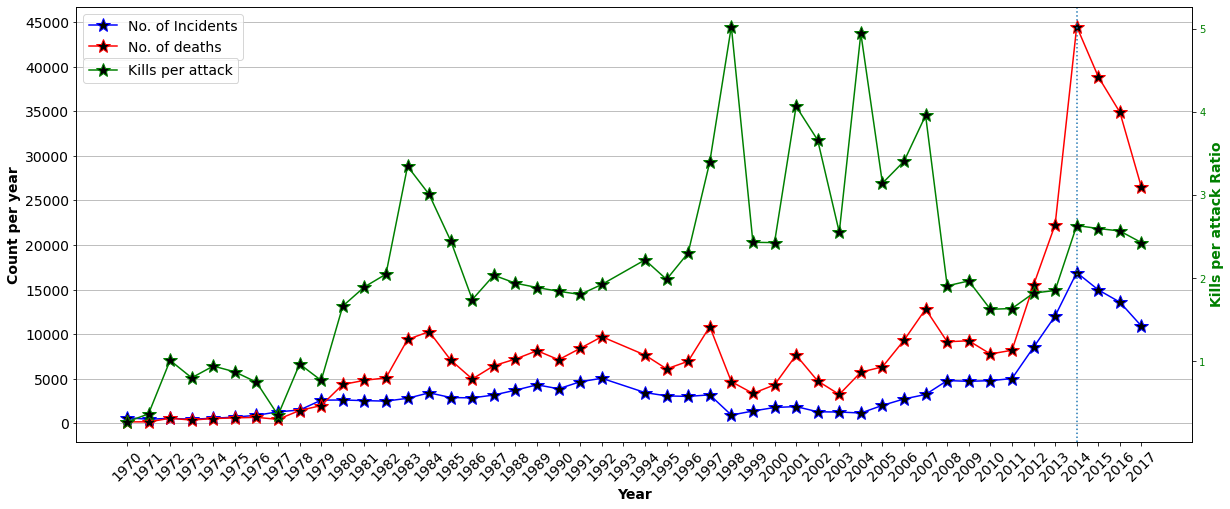

In [21]:
kill_attack_df[['eventid','nkill']].plot(color={"eventid": "blue", "nkill": "red"}, figsize = (20,8),fontsize = 14, marker = '*', mfc = 'black', ms = 15)
# formatting the plot
# giving lables
plt.xlabel('Year', fontsize = 14, fontweight='bold')
plt.ylabel('Count per year', fontsize = 14, fontweight='bold')
# adding legend
plt.legend(['No. of Incidents','No. of deaths'], fontsize = 14)
# setting axes ticks
plt.axes().set_yticks(np.arange(0, 45001, 5000))
plt.axes().set_xticks(np.arange(1970, 2018, 1))
plt.xticks(rotation=45)
# setting grid lines
plt.axvline(2014, linestyle = ':')
plt.grid(axis = 'y')

# twinx creates another y-axis sharing the same x-axis
ax2 = plt.axes().twinx()
ax2.set_ylabel('Kills per attack Ratio', fontsize = 14, fontweight='bold', color ='green')
ax2.plot(kill_attack_df['Kills per attacks'], color = 'green',marker = '*', mfc = 'black', ms = 15)
ax2.tick_params(axis ='y', labelcolor = 'green')
plt.legend(['Kills per attack'], fontsize = 14, loc = 'upper left', bbox_to_anchor=(0,0.898))
# plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.5)

plt.show()

**INFERENCE:** In the 1970s, terrorist attacks were low. 1980s saw a rise in terrorist attacks and also death count which stayed throughout the 90s. The  early 2000s saw a marginal drop in attacks but since 2007, attack count and death count have manifolded. 2014 was the most violent year in terms of both attack count and death count. Although since then, drop in terrorist activities is seen but still it is higher than any other time period.

However, the kills per attack ratio was higher in the 2000s than any other period even though less activities took place and it is relatively lower since 2007. 

## Countries and Regions with most attacks

We would present an analysis on continent wise terrorism data. The dataset however contains continents divided like 'Western Europe' and 'Eastern Europe' and similarly with Asia. So we combine the regions to make our analysis simple.

In [22]:
def change_region(data):
  if data == 'South America' or data == 'Central America & Caribbean':
    data = 'Latin America'
  elif data == 'East Asia' or data == 'South Asia' or data == 'Central Asia' or data == 'Southeast Asia':
    data = 'Asia'
  elif data == 'Western Europe' or data == 'Eastern Europe':
    data = 'Europe'
  return data
# Combining regions of Europe, Asia and Latin America
merged_continent_df = original_df.copy(deep = True)
merged_continent_df['region_txt'] = original_df['region_txt'].apply(lambda x: change_region(x))

We now find the number of terrorist attacks based on regions.

In [23]:
# grouping by regions
merged_continent_df.groupby('region_txt').count()[['eventid']].sort_values(by = 'eventid', ascending = False).T

region_txt,Asia,Middle East & North Africa,Latin America,Europe,Sub-Saharan Africa,North America,Australasia & Oceania
eventid,58824,50474,29322,21783,17550,3456,282


Creating a pie chart to show the divisions and percentage of attacks done on a region.

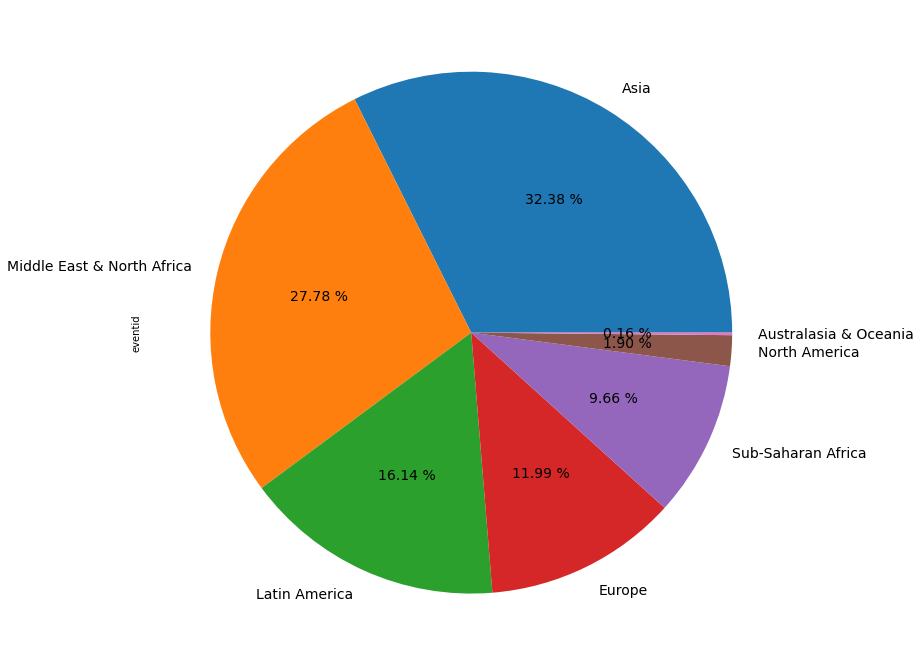

In [24]:
merged_continent_df.groupby('region_txt').count()[['eventid']].sort_values(by = 'eventid', ascending = False).plot(kind = 'pie', y = 'eventid', \
                                                figsize = (20,12),fontsize = 14, autopct='%.2f %%',)
# pie chart to show percentage
plt.axes().get_legend().set_visible(False)

**INFERENCE:** Asia saw most number of attacks closely followed by Middle East & North Africa. Australasia & Oceania which comprises of countries of Australia, New Zealand and other small island nations is the most peaceful region with less than 1% of total attacks.

Now we do country wise distribution of terrorist attacks.

In [25]:
country_df = merged_continent_df.groupby('country_txt').count()[['eventid']].sort_values(by = 'eventid', ascending = False)
country_df.T

country_txt,Iraq,Pakistan,Afghanistan,India,Colombia,Philippines,Peru,El Salvador,United Kingdom,Turkey,Somalia,Nigeria,Thailand,Yemen,Spain,Sri Lanka,United States,Algeria,France,Egypt,Lebanon,Chile,Libya,West Bank and Gaza Strip,Syria,Russia,Israel,Guatemala,South Africa,Nicaragua,Ukraine,Bangladesh,Italy,Greece,Nepal,Sudan,Argentina,Democratic Republic of the Congo,Indonesia,Germany,Iran,Kenya,Burundi,Mali,Myanmar,West Germany (FRG),Mexico,Angola,Japan,Uganda,Saudi Arabia,Mozambique,Cameroon,Honduras,Bolivia,Ireland,Venezuela,Central African Republic,Brazil,Cambodia,China,South Sudan,Ecuador,Georgia,Haiti,Bahrain,Yugoslavia,...,Djibouti,Maldives,Moldova,Uzbekistan,New Zealand,Finland,Ghana,Norway,Slovak Republic,Mauritania,Fiji,Latvia,Estonia,Luxembourg,Swaziland,Belarus,Vietnam,Martinique,Serbia,Serbia-Montenegro,East Timor,Eritrea,Botswana,Czechoslovakia,Guinea-Bissau,Belize,Gabon,Benin,Lithuania,Qatar,French Guiana,Singapore,Romania,North Yemen,Bhutan,Brunei,Slovenia,Western Sahara,Malawi,Grenada,Comoros,Montenegro,Bahamas,Solomon Islands,Iceland,People's Republic of the Congo,Gambia,Barbados,French Polynesia,Dominica,Mauritius,Turkmenistan,Equatorial Guinea,Vanuatu,St. Kitts and Nevis,South Yemen,Seychelles,International,Andorra,Falkland Islands,Wallis and Futuna,Vatican City,Antigua and Barbuda,New Hebrides,St. Lucia,South Vietnam,North Korea
eventid,24636,14368,12731,11960,8306,6908,6096,5320,5235,4292,4142,3907,3849,3347,3249,3022,2836,2743,2693,2479,2478,2365,2249,2227,2201,2194,2183,2050,2016,1970,1709,1648,1565,1275,1215,967,815,775,761,735,684,683,613,566,546,541,524,499,402,394,371,363,332,323,314,307,293,283,273,259,252,225,220,217,213,207,203,...,22,22,21,21,20,20,19,19,18,18,17,17,16,16,16,13,12,12,12,11,10,10,10,10,9,8,8,8,8,7,7,7,6,6,6,6,6,5,5,5,5,5,5,4,4,4,3,3,3,3,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1


Geting the top 10 countries with most number of terrorist attacks on bar plot.

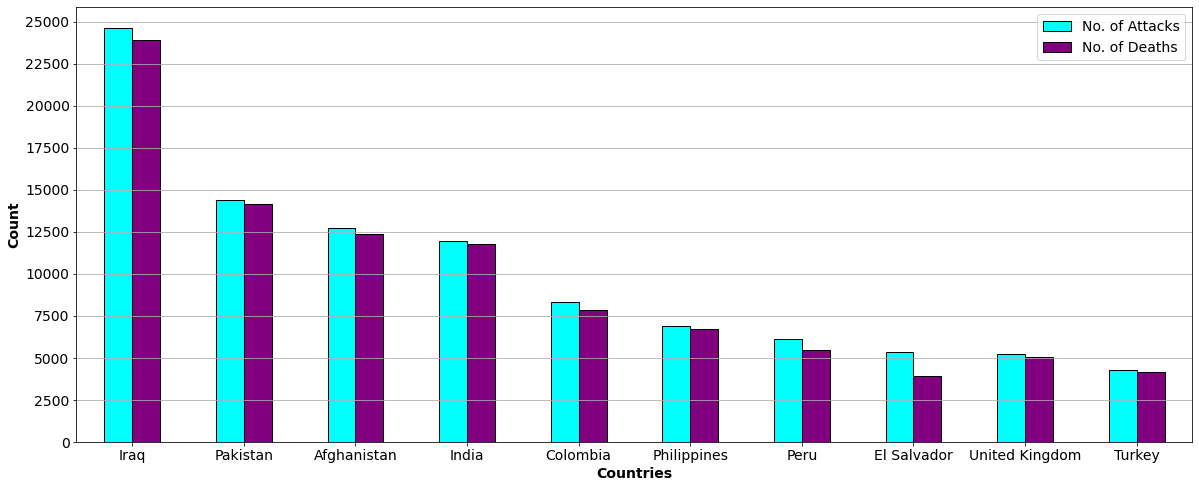

In [26]:
merged_continent_df.groupby('country_txt').count()[['eventid','nkill']].sort_values(by = 'eventid', ascending = False).head(10).plot(kind = 'bar', \
                                                figsize = (20,8),fontsize = 14, edgecolor = 'black', color = ['cyan','purple'])

# formatting the plot
plt.xlabel('Countries', fontsize = 14, fontweight='bold')
plt.ylabel('Count', fontsize = 14, fontweight='bold')
plt.legend(['No. of Attacks','No. of Deaths'], fontsize = 14)
plt.axes().set_yticks(np.arange(0, 25001, 2500))
plt.grid(axis = 'y')
plt.xticks(rotation = 0)
plt.show()

We now see on World map, the countries with most terrorist attacks.

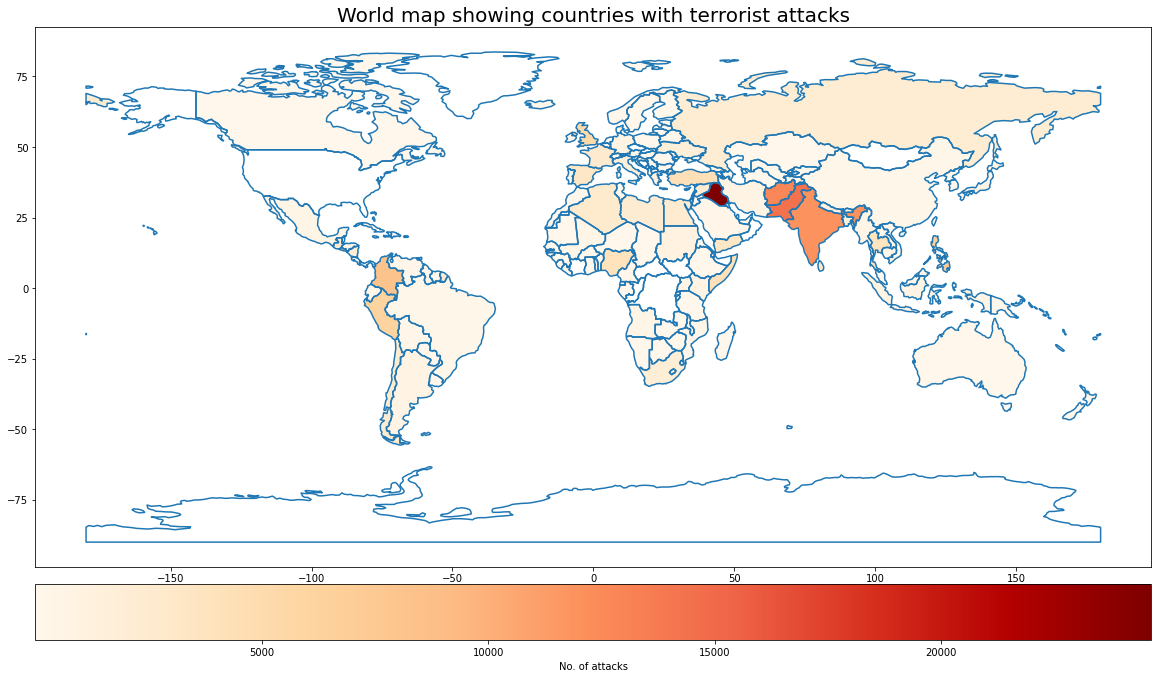

In [27]:
# using geopandas module we create geopandas dataframe containg info to create world map
# “naturalearth_lowres” is a base map provided with geopandas which we loaded
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# merging the map dataframe and our dataframe as geopandas dataframe to display info on the map
df_world_map = df_world.merge(country_df, how="left", left_on=['name'], right_on=['country_txt'])
# plotting the merged geopandas dataframe as world map with info of our dataframe
ax1 = df_world_map["geometry"].boundary.plot(figsize=(20,16))
df_world_map.plot( column="eventid", ax=ax1, cmap='OrRd', 
                     legend=True, legend_kwds={"label": "No. of attacks", "orientation":"horizontal",  "pad":0.02})
plt.title(label ='World map showing countries with terrorist attacks', fontsize = 20)
plt.show()

**INFERENCE:** Iraq is in a league of its own with almost 25000 attacks and death count separately, making it world's most violent country. Pakistan and Afghanistan complete the 2nd and 3rd place respectively. Unfortunately, India is not far behind, claiming the 4th spot.

United Kingdom also makes it way into the list being a developed nation. Most of the countries belong to the region of "Middle East and North Africa", "Asia" and "Latin America" which were the top 3 violent regions as seen in the pie chart.

## Terrorist organizations with most number of attacks

In this section, we present the list of the terrorist organizations who have performed most no. of attacks and have inflicted maximum casualties.

In [28]:
# grouping by terrorist group name and finding attack and death count
ter_group_df = df.groupby(['gname']).agg({'eventid':'count','nkill':'sum'}).sort_values(by = 'eventid', ascending = False)
ter_group_df.drop(labels = 'Unknown', inplace = True)
ter_group_df.T

gname,Taliban,Islamic State of Iraq and the Levant (ISIL),Shining Path (SL),Farabundo Marti National Liberation Front (FMLN),Al-Shabaab,New People's Army (NPA),Irish Republican Army (IRA),Revolutionary Armed Forces of Colombia (FARC),Boko Haram,Kurdistan Workers' Party (PKK),Basque Fatherland and Freedom (ETA),Communist Party of India - Maoist (CPI-Maoist),Maoists,Liberation Tigers of Tamil Eelam (LTTE),National Liberation Army of Colombia (ELN),Tehrik-i-Taliban Pakistan (TTP),Palestinians,Houthi extremists (Ansar Allah),Al-Qaida in the Arabian Peninsula (AQAP),Nicaraguan Democratic Force (FDN),Manuel Rodriguez Patriotic Front (FPMR),Sikh Extremists,Al-Qaida in Iraq,Corsican National Liberation Front (FLNC),Muslim extremists,Donetsk People's Republic,African National Congress (South Africa),Separatists,Tupac Amaru Revolutionary Movement (MRTA),M-19 (Movement of April 19),Abu Sayyaf Group (ASG),Fulani extremists,Sinai Province of the Islamic State,Palestinian Extremists,People's Liberation Front (JVP),National Union for the Total Independence of Angola (UNITA),Hamas (Islamic Resistance Movement),Hezbollah,Bangsamoro Islamic Freedom Movement (BIFM),Algerian Islamic Extremists,Narco-Terrorists,Moro Islamic Liberation Front (MILF),United Liberation Front of Assam (ULFA),Tripoli Province of the Islamic State,Khorasan Chapter of the Islamic State,Protestant extremists,Chechen Rebels,Death Squad,Lord's Resistance Army (LRA),Baloch Republican Army (BRA),Mozambique National Resistance Movement (MNR),Movement of the Revolutionary Left (MIR) (Chile),Muslim Militants,Al-Nusrah Front,Gunmen,Ulster Volunteer Force (UVF),Popular Liberation Army (EPL),Ulster Freedom Fighters (UFF),Al-Gama'at al-Islamiyya (IG),Al-Qaida in the Islamic Maghreb (AQIM),Dev Sol,Neo-Nazi extremists,Armed Islamic Group (GIA),Nicaraguan Resistance,Allied Democratic Forces (ADF),Janjaweed,Tamils,...,Islamic Struggle Front,Islamic Swords of Justice in the Land of Ribat,Islamic Tendency,Islamist Sufi Group,Israel Militant,Issui Kai,Islamic Revival Movement,Italian Combatents for Alto Adige,Italian Extreme Nationalist Organization,Italians Attacking Policies of the Regional SVP,Itsekiri,Ivorian Popular Front,Izberbash Gang,Islamic Revolutionary Command,Islamic Renewal Movement,Jihadist Soldiers,Islamic Holy Star,Islamic Brotherhood,Islamic Companies,Islamic Fateh,Islamic Front for the Liberation of Bahrain,Islamic Front for the Liberation of Palestine (IFLP),Islamic Golden Army,Islamic Jihad Beit-al Maqdis Group,Islamic Movement of Martyrs,Islamic Jihad Brigades,Islamic Legion,Islamic Liberation Organization,Islamic Movement (Nigeria),Islamic Movement for Change,Islamic Movement of Iraqi Mujahidin,Jacinto Araujo Internationalist Rebel Insurrectionist Brigade,Jacques de Molay Group,Jagrata Towhidi Janata (Rising Faithfuls),Jewish Defense Organization,Jatav Caste,Javier Heraud Revolutionary Commando,Jenin Martyrs Brigades,Jerusalem Groups Hebrew (Qvutzot Yerushalayim),Jewish Combat Organization,Jewish Defenders,Jewish Direct Action,Jai Shri Ram Hindu Bhai Group,Jewish Fighting Organization (Eyal),Jharkhand Bachao Aandolan,Jharkhand Kranti Raksha Dal (Utari Chotanagpur),Jihad Brigades,Jihad Islamic League Front,Jihadi Movement of the Sunna People of Iran,Jarnail Khalsa,Japanese Independence Patriotic Party,Japan Socialist Youth League of the Revolutionary Workers' Association,Japan National Youth Alliance,Janatantrik Tiger Janashakti Party,Janatantrik Terai Mukti Morcha- Ranbir Singh (JTMM-RS),Janatantrik Terai Madhes Mukti Party- Bhagat Singh (JTMMP),Jamaat Tauhid Wal Jihad (Pakistan),Jaljala Army,Jaish-e-Mohammad (Iraq),Jaish as-Saiyouf (Army of Swords),Jaish al-Umar (JaU),Jaish al-Mukhtar,Jaish al-Muhajireen wal-Ansar (Muhajireen Army),Jaish al-Islam (Libya),Jaish Tahkim al-Din,Jaish Al-Umma (Army of the Nation),leftist guerrillas-Bolivarian militia
eventid,7469.0,5613.0,4532.0,3343.0,3281.0,2752.0,2658.0,2465.0,2418.0,2306.0,2016.0,1870.0,1625.0,1600.0,1547.0,1343.0,1120

We create 2 different bar plots to show the top 10 terrorist organizations in terms of no. of attacks and death count. (A single bar plot can rank based on only one factor, but we want to see the rankings in terms of both attack count and death count)

In [29]:
# this function is to wrap a text in matplotlib plots so that the xtick labels do not overlap
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

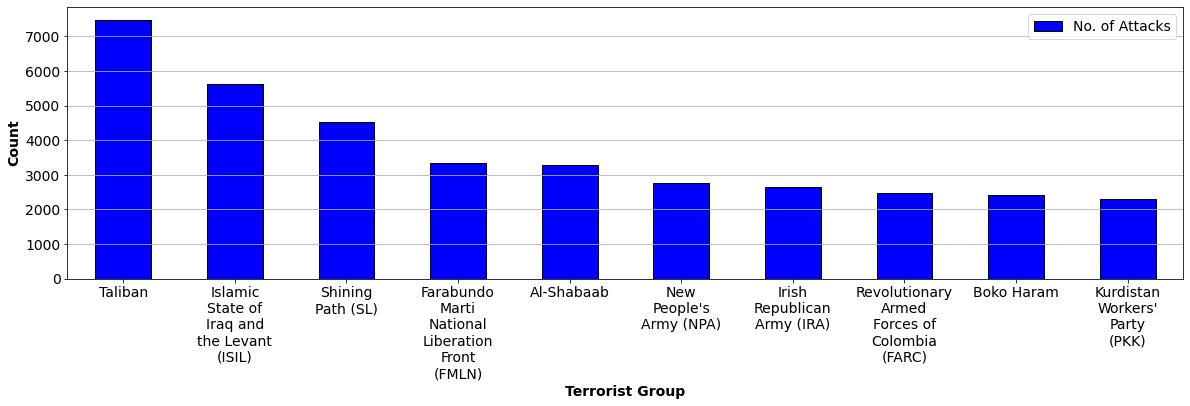

In [30]:
ter_group_df.sort_values(by = 'eventid', ascending = False)['eventid'].head(10).plot(kind = 'bar',figsize = (20,5),fontsize = 14, color ='blue',edgecolor='black')
plt.xlabel('Terrorist Group', fontsize = 14, fontweight='bold')
plt.ylabel('Count', fontsize = 14, fontweight='bold')
plt.legend(['No. of Attacks'], fontsize = 14)
# calling the wrap function, if sentence is longer than 10 letters, then newline is added
wrap_labels(plt.axes(), 10)
plt.axes().figure
plt.grid(axis = 'y')
plt.show()


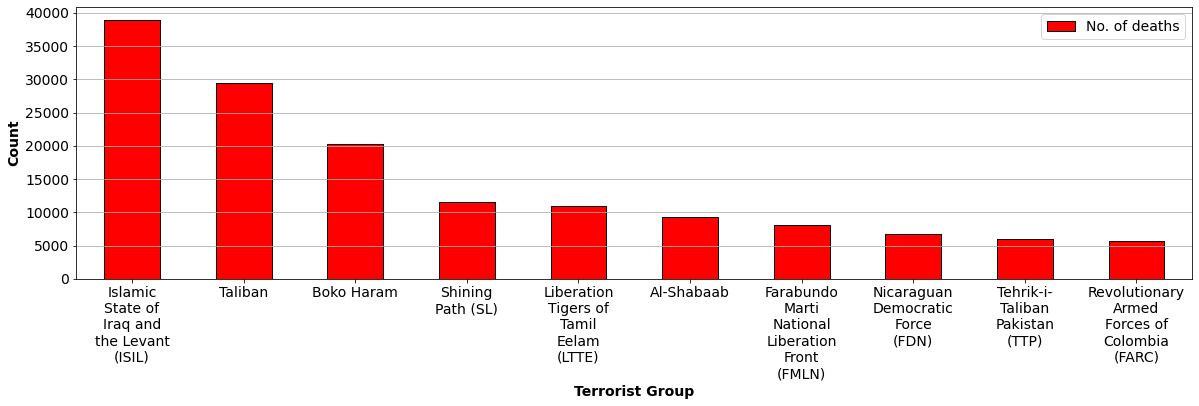

In [31]:
ter_group_df.sort_values(by = 'nkill', ascending = False)['nkill'].head(10).plot(kind = 'bar',figsize = (20,5),fontsize = 14, color = 'red', edgecolor='black')
plt.xlabel('Terrorist Group', fontsize = 14, fontweight='bold')
plt.ylabel('Count', fontsize = 14, fontweight='bold')
plt.legend(['No. of deaths'], fontsize = 14)

wrap_labels(plt.axes(), 10)
plt.axes().figure
plt.grid(axis = 'y')
plt.show()

**INFERENCE:** In terms of number of attacks, Taliban claims the top spot with more than 7000 attacks. Islamic State (ISIL) follows with 2nd rank and Shining Path is on 3rd place.

In terms of killings however, ISIL is on top with around 40000 deaths followed by Taliban with around 30000 deaths. This says that ISIL have performed most brutal attacks which has resulted in more killings.

Boko Haram which came 9th in terms of no. of attack is on 3rd in terms of killings. So we can conclude ISIL and Boko Haram perform the most barbaric attacks.

### Kills per attack

From above inference, we got top 4 violent terrorist groups. Here, we measure the 'Kills per attack' ratio for those organizations.

In [32]:
grp = ['Taliban', 'Islamic State of Iraq and the Levant (ISIL)','Shining Path (SL)','Boko Haram']
ter_group_df["Kills per attack"] = ter_group_df['nkill']/ter_group_df['eventid']
ter_group_df.loc[grp,['Kills per attack']].sort_values(by = 'Kills per attack', ascending = False)

,Kills per attack
gname,
Boko Haram,8.406948
Islamic State of Iraq and the Levant (ISIL),6.934438
Taliban,3.936270
Shining Path (SL),2.535525


**INFERENCE:** As we concluded in previous section, Boko Haram has most violent attacks measuring more than 8 kills per attacks followed by ISIL with almost 7 kills per attacks. 

### Timeline of Terrorist groups

We now plot chart showing the years when these 4 terrorist groups were active.

In [33]:
# grouping by years and groupname and then unstacking the multiindex so that we can plot
ter_group_df2 = df.groupby(['iyear','gname']).count()[['eventid']].unstack(level = 0)
# selecting data for only those 4 groups
ter_group_df2 = ter_group_df2[(ter_group_df2.index == grp[0]) |(ter_group_df2.index == grp[1])|(ter_group_df2.index == grp[2])|(ter_group_df2.index == grp[3])]
ter_group_df2

eventid                           \
iyear                                          1970 1971 1972 1973 1974 1975   
gname                                                                          
Boko Haram                                      NaN  NaN  NaN  NaN  NaN  NaN   
Islamic State of Iraq and the Levant (ISIL)     NaN  NaN  NaN  NaN  NaN  NaN   
Shining Path (SL)                               NaN  NaN  NaN  NaN  NaN  NaN   
Taliban                                         NaN  NaN  NaN  NaN  NaN  NaN   

                                                                             \
iyear                                       1976 1977 1978 1979  1980  1981   
gname                                                                         
Boko Haram                                   NaN  NaN  NaN  NaN   NaN   NaN   
Islamic State of Iraq and the Levant (ISIL)  NaN  NaN  NaN  NaN   NaN   NaN   
Shining Path (SL)                            NaN  NaN  1.0  1.0  25.0  86.0   
Taliban                                      NaN  NaN  NaN  NaN   NaN   NaN   

                                                                         \
iyear                                         1982   1983   1984   1985   
gname                                                                     
Boko Haram                                     NaN    NaN    NaN    NaN   
Islamic State of Iraq and the Levant (ISIL)    NaN    NaN    NaN    NaN   
Shining Path (SL)                            249.0  487.0  488.0  249.0   
Taliban                                        NaN    NaN    NaN    NaN   

                                                                         \
iyear                                         1986   1987   1988   1989   
gname                                                                     
Boko Haram                                     NaN    NaN    NaN    NaN   
Islamic State of Iraq and the Levant (ISIL)    NaN    NaN    NaN    NaN   
Shining Path (SL)                            391.0  464.0  277.0  508.0   
Taliban                                        NaN    NaN    NaN    NaN   

                                                                              \
iyear                                         1990   1991   1992  1994  1995   
gname                                                                          
Boko Haram                                     NaN    NaN    NaN   NaN   NaN   
Islamic State of Iraq and the Levant (ISIL)    NaN    NaN    NaN   NaN   NaN   
Shining Path (SL)                            371.0  425.0  286.0  74.0  34.0   
Taliban                                        NaN    NaN    NaN   NaN   4.0   

                                                                             \
iyear                                        1996  1997 1998 1999 2000 2001   
gname                                                                         
Boko Haram                                    NaN   NaN  NaN  NaN  NaN  NaN   
Islamic State of Iraq and the Levant (ISIL)   NaN   NaN  NaN  NaN  NaN  NaN   
Shining Path (SL)                            23.0  31.0  3.0  5.0  2.0  3.0   
Taliban                                       NaN   NaN  NaN  NaN  NaN  4.0   

                                                                            \
iyear                                       2002  2003  2004   2005   2006   
gname                                                                        
Boko Haram                                   NaN   NaN   NaN    NaN    NaN   
Islamic State of Iraq and the Levant (ISIL)  NaN   NaN   NaN    NaN    NaN   
Shining Path (SL)                            1.0   1.0   2.0    1.0    1.0   
Taliban                                      6.0  50.0  55.0  120.0  162.0   

                                                                         \
iyear                                         2007   2008   2009   2010   
gname                                                            

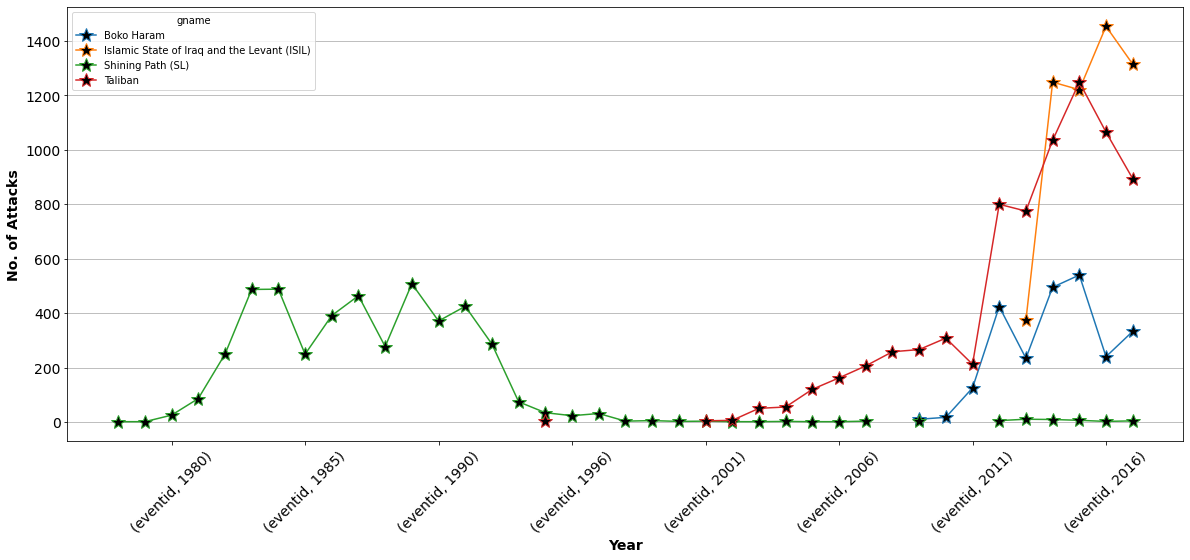

In [34]:
ter_group_df2.T.plot(kind = 'line', marker = '*', mfc = 'black', ms = 15,figsize = (20,8),fontsize = 14)
# formatting
plt.xlabel('Year', fontsize = 14, fontweight='bold')
plt.ylabel('No. of Attacks', fontsize = 14, fontweight='bold')
plt.grid(axis = 'y')
plt.xticks(rotation=45)
plt.show()


We now see on the world map where these 4 terrorist organizations have operated mostly.

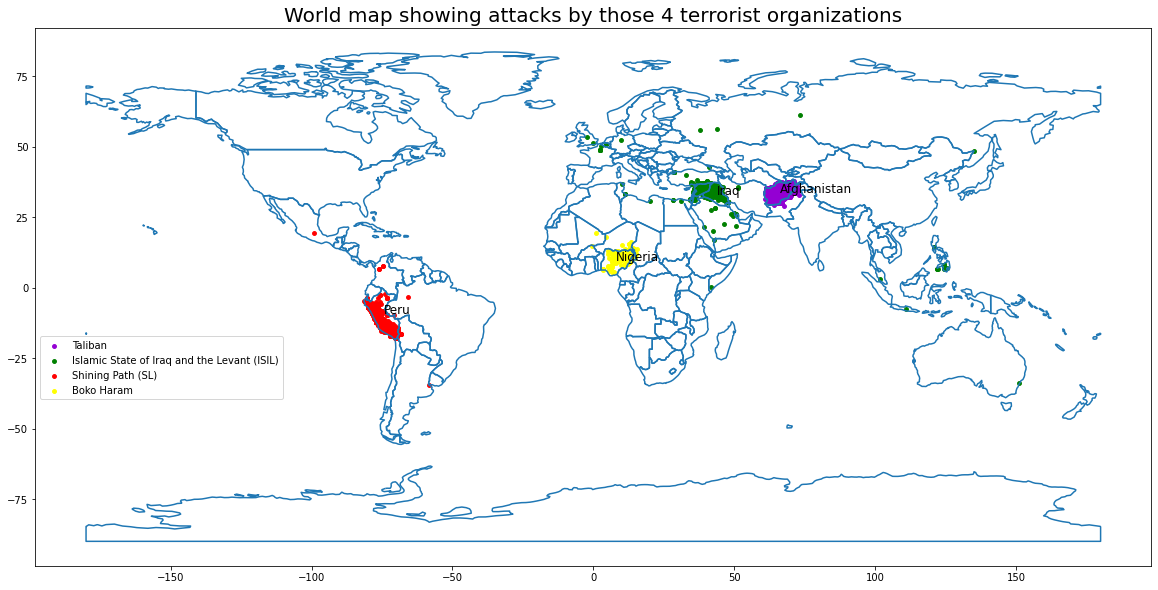

In [35]:
# creating world boundary map
ax = df_world.boundary.plot(figsize=(20, 16), label = '_hide')
# for every terrorist group of those 4, we see where they have operated on the map
# create dataframe for attacks by Taliban
ter1 = df[(df['gname'] == grp[0])]
# creating list of points using latitude and longitude column
geometry = [Point(xy) for xy in zip(ter1['longitude'], ter1['latitude'])]
# creating a geopandas dataframe using the latitude and longitudes 
gdf = gpd.GeoDataFrame(ter1, geometry = geometry)
# plotting the latitudes and longitudes on world map
gdf.plot(ax=ax, marker='o', color='darkviolet', markersize=15);
# annotating the name of countries where the terrorist group has more than 1000 attacks
df_world.apply((lambda x: ax.annotate(s=x['name'], xy=x.geometry.centroid.coords[0],fontsize = 12) \
                if (np.count_nonzero(ter1['country_txt'].values == x['name'])>1000) else ''), axis=1)

# Doing the above process for rest 3 terrorist groups
ter1 = df[(df['gname'] == grp[1])]
geometry = [Point(xy) for xy in zip(ter1['longitude'], ter1['latitude'])]
gdf = gpd.GeoDataFrame(ter1, geometry = geometry)
gdf.plot(ax=ax, marker='o', color='green', markersize=15);
df_world.apply((lambda x: ax.annotate(s=x['name'], xy=x.geometry.centroid.coords[0],fontsize = 12) \
                if (np.count_nonzero(ter1['country_txt'].values == x['name'])>1000) else ''), axis=1)

ter1 = df[(df['gname'] == grp[2])]
geometry = [Point(xy) for xy in zip(ter1['longitude'], ter1['latitude'])]
gdf = gpd.GeoDataFrame(ter1, geometry = geometry)
gdf.plot(ax=ax, marker='o', color='red', markersize=15);
df_world.apply((lambda x: ax.annotate(s=x['name'], xy=x.geometry.centroid.coords[0],fontsize = 12) \
                if (np.count_nonzero(ter1['country_txt'].values == x['name'])>1000) else ''), axis=1)

ter1 = df[(df['gname'] == grp[3])]
geometry = [Point(xy) for xy in zip(ter1['longitude'], ter1['latitude'])]
gdf = gpd.GeoDataFrame(ter1, geometry = geometry)
gdf.plot(ax=ax, marker='o', color='yellow', markersize=15);
df_world.apply((lambda x: ax.annotate(s=x['name'], xy=x.geometry.centroid.coords[0],fontsize = 12) \
                if (np.count_nonzero(ter1['country_txt'].values == x['name'])>1000) else ''), axis=1)

plt.legend(['_g',grp[0],grp[1],grp[2],grp[3]], loc = 'lower left', bbox_to_anchor=(0,0.3))
plt.title('World map showing attacks by those 4 terrorist organizations', fontsize = 20)
plt.show()

**INFERENCE:** Shining Path group was active in the 80s and early 90s when no other of the 3 were active. Since then it conducted almost negligible attacks.

Boko Haram, Taliban and ISIL have started expanding their operations since 2011.
Boko Haram, as concluded in the previous inference, have performed less no. of attacks than Taliban and ISIL even though its death count was significantly high.

The map shows the countries facing most attacks by these terrorist groups namely Afghanistan by Taliban, Iraq by ISIL, Nigeria by Boko Haram and Peru by Shining Path.


## Insurgencies

In this section, we present the data on insurgencies. Insurgency is a violent, armed rebellion against authority or government. So, a region with more number of insurgencies hints at weak political power and lack of good governance.

In [36]:
# alternative_txt column contains information on insurgencies
df.alternative_txt.unique()

array([nan, 'Other Crime Type', 'Insurgency/Guerilla Action',
       'Intra/Inter-group Conflict', 'State Actors',
       'Lack of Intentionality'], dtype=object)

In [37]:
# creating a separate dataframe for insurgenices
insurgency_df = df[df['alternative_txt'] == 'Insurgency/Guerilla Action']

Here, we find the countries that have faced the most number of insurgencies.

In [38]:
insurg_df = insurgency_df.groupby(['country_txt']).count()[['eventid']].sort_values(by = 'eventid', ascending = False)
insurg_df.head(10).T

country_txt,Iraq,Afghanistan,El Salvador,Somalia,Philippines,Pakistan,Nicaragua,Colombia,Yemen,Turkey
eventid,2692,1808,1547,1351,1306,1288,973,910,860,850


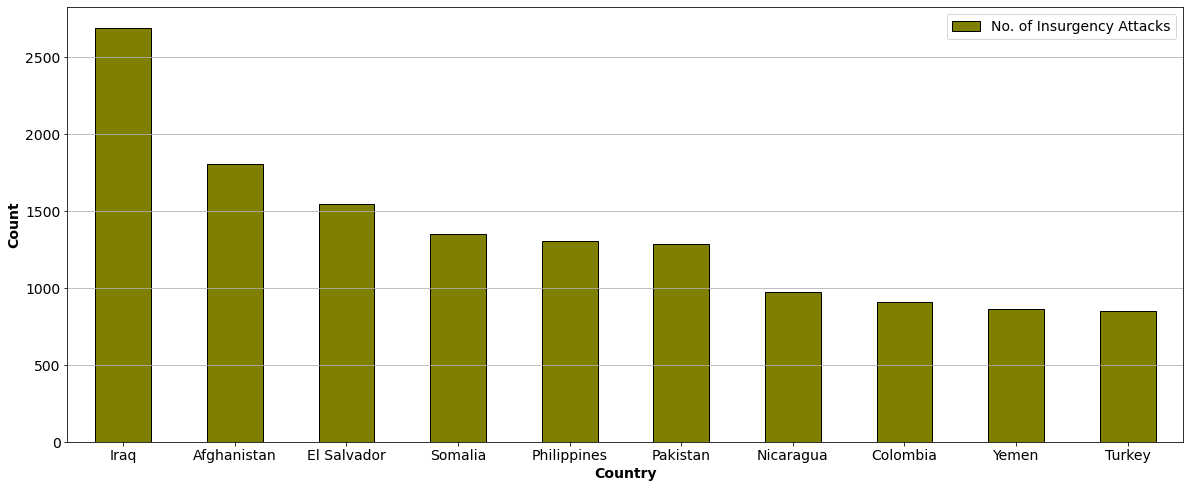

In [39]:
insurgency_df.groupby(['country_txt']).count()[['eventid']].sort_values(by = 'eventid', ascending = False).head(10) \
                                                                  .plot(kind = 'bar',figsize = (20,8),fontsize = 14, edgecolor = 'black', color ='olive' )
# formatting the plot
plt.xlabel('Country', fontsize = 14, fontweight='bold')
plt.ylabel('Count', fontsize = 14, fontweight='bold')
plt.legend(['No. of Insurgency Attacks'], fontsize = 14)
plt.xticks(rotation = 0)
plt.grid(axis = 'y')
plt.show()

**INFERENCE:** Iraq tops the list here again with more than 2500 insurgency attacks, Afghanistan and El Salvador completing the top 3 positions. This signifies political crises in these countries and changing of political regimes frequently, as insurgencies aim in toppling the current authority and more number of insurgencies will weaken the pillars of foundation of the government.

## Most lethal attacks

Here, we present a list of top 3 attacks which has claimed most number of lives in a single attack.

In [40]:
# using this function, we can extend a dataframe cell contents into multiple lines 
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )
# sorting nkill column will give most no. of deaths in single attack  
kills_df = df.sort_values(by = 'nkill', ascending = False, ignore_index = True)
kills_df.index += 1
# extending the column width
pd.options.display.max_colwidth = 150
# wrapping text to next line if letter count more than 150
pretty_print(kills_df.head(3)[['country_txt','city', 'summary','nkill']])


,country_txt,city,summary,nkill
1,Iraq,Tikrit,"06/12/2014: Assailants abducted approximately 1686 soldiers from Camp Speicher in Tikrit city, Saladin governorate, Iraq. Two captives escaped custody and at least 1570, if not all of the remaining victims, are presumed dead. The Islamic State of Iraq and the Levant (ISIL) claimed responsibility and stated that the attacks were in revenge for the killing of ISIL leader Abdul-Rahman al-Beilawy.",1570.0
2,United States,New York City,"09/11/2001: This was one of four related attacks that occurred in the United States that are known collectively as the 9/11 Terrorist Attacks. In the first attack, which occurred at 8:46 am local time, American Airlines Flight 11 crashed into the North Tower of the World Trade Center Complex in New York City, New York. Five hijackers belonging to Al-Qaida took control of the Boeing 767 aircraft on a flight originating from Logan International Airport in Boston, Massachusetts, and destined for Los Angeles International Airport. There were 76 passengers, 11 crew members and five hijackers on the plane, all of whom died upon impact. The North Tower collapsed at 10:28 a.m. local time after the South Tower had collapsed at 9:59 a.m. local time. At least 2,767 people died as a result of the attacks in New York City, including 10 hijackers as well as responders who contracted cancer and respiratory illnesses at the attack site and passed away years later. More than 16,000 others were injured. Al-Qaida leaders including Osama bin Laden and Khalid Shaikh Mohammed claimed responsibility for the attacks in multiple videotaped interviews.",1384.0
3,United States,New York City,"09/11/2001: This was one of four related attacks that occurred in the United States that are known collectively as the 9/11 Terrorist Attacks. In the second of these attacks, which occurred at 9:03 a.m. local time, United Airlines Flight 175 crashed into the South Tower of the World Trade Center Complex in New York City, New York. Five hijackers belonging to Al-Qaida hijacked the Boeing 767 aircraft on a flight originating from Logan International Airport in Boston, Massachusetts, and destined for Los Angeles International Airport. There were 56 passengers, nine crew members and five hijackers on the plane, all of whom died upon impact. The South Tower collapsed at 9:59 a.m. local time, killing all who were trapped inside or located nearby. The North Tower collapsed, after having been struck by American Airlines Flight 11, at 10:28 a.m. local time. At least 2,767 people died as a result of the attacks in New York City, including 10 hijackers as well as responders who contracted cancer and respiratory illnesses at the attack site and passed away years later. More than 16,000 others were injured. Al-Qaida leaders including Osama bin Laden and Khalid Shaikh Mohammed claimed responsibility for the attacks in multiple videotaped interviews.",1383.0


**INFERENCE:** Attack in Tikrit in Iraq on 12 June 2014 remains the devastating attack in the history claiming 1570 lives. Two of the four attacks of the infamous 9/11 attacks in New York also make their way into the list which took lives of 2767 people combined. 

## Deadliest type of attack

In this section, we present the information on type of attack used by terrorists. 
'attacktype1_txt' column has information on the type of attacks used by terrorist for a particular event like assassination, hijacking, bombing/explosion,etc.

In [41]:
# grouping by attacktype column
attacktype_df = df.groupby(['attacktype1_txt']).sum()[['nkill']]
# sorting by kill count
attacktype_df.sort_values(by = 'nkill', ascending = False, inplace = True)
attacktype_df.drop(labels = 'Unknown', inplace = True)
attacktype_df.T

attacktype1_txt,Armed Assault,Bombing/Explosion,Assassination,Hostage Taking (Kidnapping),Hostage Taking (Barricade Incident),Hijacking,Facility/Infrastructure Attack,Unarmed Assault
nkill,159640.0,157235.0,24776.0,24129.0,4478.0,3715.0,3640.0,879.0


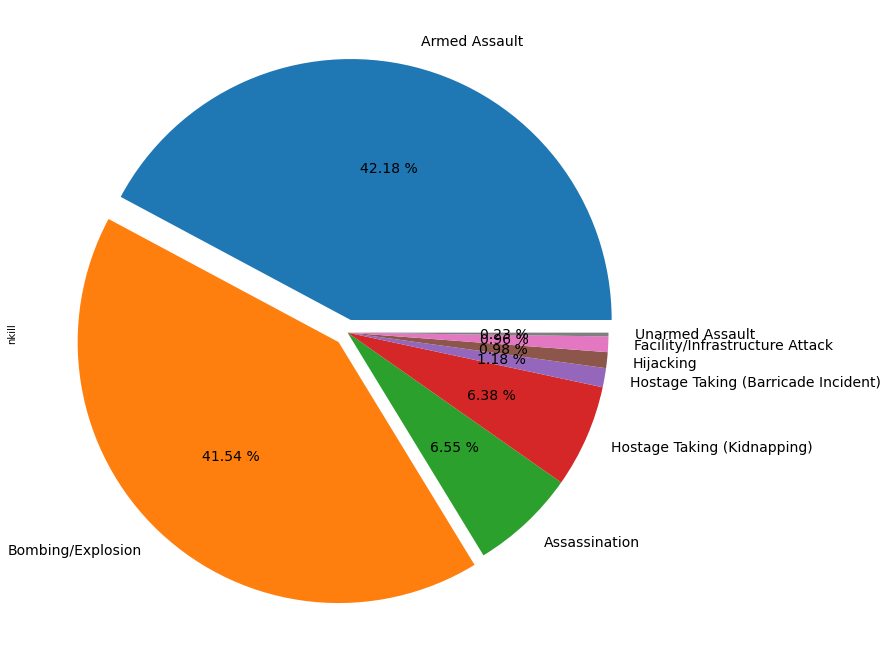

In [42]:
attacktype_df.plot(kind='pie', y='nkill',figsize = (20,12),fontsize = 14, autopct='%.2f %%', \
                                                              explode = [0.05,0.05,0,0,0,0,0,0])

plt.axes().get_legend().set_visible(False)

**INFERENCE:** Armed Assault and Bombing/Explosion combined have taken more than 80% of lives than any other attack. And so in future, these will be the preferred methods for the terrorists to conduct the attacks.  

## Property Damage

The property damage column which shows the extent of damage occurred in an attacks in terms of money has 3 categories of Minor, Major and Catastrophic. The Catastrophic category means attacks which have caused a financial loss of over $1 billion. And we have only 6 of those in history. We print those information.

In [43]:
# printing the number of property damage categories
df.groupby(['propextent_txt','iyear']).count()[['eventid']].drop(labels = 'Unknown').unstack()

eventid                     \
iyear                                            1970   1971  1972  1973   
propextent_txt                                                             
Catastrophic (likely >= $1 billion)               NaN    NaN   NaN   NaN   
Major (likely >= $1 million but < $1 billion)    10.0    2.0   3.0   2.0   
Minor (likely < $1 million)                     353.0  164.0  65.0  68.0   

                                                                           \
iyear                                           1974   1975   1976   1977   
propextent_txt                                                              
Catastrophic (likely >= $1 billion)              NaN    NaN    NaN    NaN   
Major (likely >= $1 million but < $1 billion)    4.0    1.0    6.0   21.0   
Minor (likely < $1 million)                    129.0  172.0  254.0  532.0   

                                                                           \
iyear                                           1978   1979   1980   1981   
propextent_txt                                                              
Catastrophic (likely >= $1 billion)              NaN    NaN    NaN    NaN   
Major (likely >= $1 million but < $1 billion)   13.0   21.0   15.0   11.0   
Minor (likely < $1 million)                    676.0  482.0  284.0  363.0   

                                                                           \
iyear                                           1982   1983   1984   1985   
propextent_txt                                                              
Catastrophic (likely >= $1 billion)              NaN    NaN    NaN    NaN   
Major (likely >= $1 million but < $1 billion)   14.0   11.0   13.0   13.0   
Minor (likely < $1 million)                    592.0  457.0  568.0  582.0   

                                                                           \
iyear                                           1986   1987   1988   1989   
propextent_txt                                                              
Catastrophic (likely >= $1 billion)              NaN    NaN    NaN    NaN   
Major (likely >= $1 million but < $1 billion)   10.0   10.0   11.0   14.0   
Minor (likely < $1 million)                    412.0  794.0  791.0  552.0   

                                                                           \
iyear                                           1990   1991   1992   1994   
propextent_txt                                                              
Catastrophic (likely >= $1 billion)              NaN    NaN    1.0    NaN   
Major (likely >= $1 million but < $1 billion)    7.0   30.0   21.0   12.0   
Minor (likely < $1 million)                    591.0  614.0  322.0  118.0   

                                                                               \
iyear                                          1995  1996  1997   1998   1999   
propextent_txt                                                                  
Catastrophic (likely >= $1 billion)             NaN   1.0   NaN    NaN    NaN   
Major (likely >= $1 million but < $1 billion)   2.0   7.0  13.0   18.0   41.0   
Minor (likely < $1 million)                    44.0  36.0  25.0  345.0  498.0   

                                                                           \
iyear                                           2000   2001   2002   2003   
propextent_txt                                                              
Catastrophic (likely >= $1 billion)              NaN    4.0    NaN    NaN   
Major (likely >= $1 million but < $1 billion)   57.0   61.0   31.0   29.0   
Minor (likely < $1 million)                    434.0  551.0  311.0  425.0   

                                                                           \
iyear                                           2004   2005   2006   2007   
propextent_txt                                                              
Catastrophic (likely >= $1 billion)              NaN    NaN    NaN    NaN   
Major (likely >=

In [44]:
cat_df = df[df['propextent_txt'] == 'Catastrophic (likely >= $1 billion)']
cat_df['propcomment'] = cat_df['propcomment'].str.wrap(100)
cat_df['target1'] = cat_df['target1'].str.wrap(20)
# again calling the wrap function
pretty_print(cat_df[['iyear','country_txt','gname','target1','propcomment']])

,iyear,country_txt,gname,target1,propcomment
50996,1992,United Kingdom,Irish Republican Army (IRA),London FinancialDistrict,"Damages: explosion, destroyed historic building and damaged surrounding buildings, estimated at$2,700,000,000 (London financial district)"
62651,1996,United Kingdom,Irish Republican Army (IRA),Arndale Centre andMarket Street,£700 million (value in US Dollars estimated)
73126,2001,United States,Al-Qaida,Passengers and crewmembers on AmericanAirlines Flight 11and the peopleworking in the NorthTower of the WorldTrade Center in NewYork City,"The crash resulted in the destruction of an American Airlines Boeing 767 aircraft. All personalbelongings stowed on the plane were destroyed as well. Also destroyed was the North Tower of theWorld Trade Center complex in New York City, which collapsed as a result of the impact andsubsequent fire. The building's collapse undoubtedly damaged the foundation of nearby buildings,though the South Tower had already fallen. Businesses located in the North Tower suffered massiveeconomic losses. Air travel was restricted or prevented in the United States for several monthsfollowing the attacks. Total losses to the United States Airline industry are unknown, but extremelyhigh. Several major United States airlines were nearly bankrupted in the aftermath of the attacks.The attacks had a negative impact on the U.S. and world economy."
73127,2001,United States,Al-Qaida,Passengers and crewmembers on UnitedAirlines Flight 175and the peopleworking in the SouthTower of the WorldTrade Center in NewYork City,"The crash resulted in the destruction of an United Airlines Boeing 767 aircraft. All personalbelongings stowed on the plane were destroyed as well. Also destroyed was the South Tower of theWorld Trade Center Complex in New York City, which collapsed as a result of the impact andsubsequent fire. The building's collapse undoubtedly damaged the foundation of nearby buildings,including the North Tower. Businesses located in the South Tower suffered massive economic losses.Air travel was restricted or prevented in the United States for several months following theattacks. Total losses to the United States Airline industry are unknown, but extremely high. Severalmajor United States airlines were nearly bankrupted in the aftermath of the attacks. The attacks hada massive impact on the U.S. and world economy."
73128,2001,United States,Al-Qaida,Passengers and crewmembers on AmericanAirlines Flight 77and Pentagonpersonnel,"The crash resulted in the destruction of an American Airlines Boeing 757 aircraft. All personalbelongings stowed on the plane were destroyed as well. Also destroyed was the western facing wall ofthe Pentagon. Air travel was restricted or prevented in the United States for several monthsfollowing the attacks. Total losses to the United States Airline industry are unknown, but extremelyhigh. Several major United States airlines were nearly bankrupted in the aftermath of the attacks.The attacks had a negative impact on the U.S. and world economy."
73129,2001,United States,Al-Qaida,Airline passengersand crew members onboard AmericanAirlines Flight 93and personnel at theintended CapitolBuilding target,"The crash resulted in the destruction of an United Airlines owned Boeing 757 airplane. All personalbelongings stowed on the plane were destroyed as well. Air travel was restricted or prevented in theUnited States for several months following the attacks. Total losses to the United States Airlineindustry are unknown, but extremely high. Several major United States airlines were nearlybankrupted in the aftermath of the attacks. The attacks had a negative impact on the U..S and worldeconomy."


**INFERENCE:** The top 2 catastrophic attacks happened in United Kingdom by the Irish Republican Army. The other 4 are the separate coordinated attacks that belong to the 9/11 attacks by Al-Qaida group. No other attack in the history since 1970 has caused as much financial loss as these have caused.

## Correlation

Our general conscience says more the number of attacks, more the number of deaths and wounded. Let's check that mathematically. Here, we try to find correlation between "No. of Terrorist attacks", "No. of Deaths per attack", "No. of wounded per attack" and also "Count of Property damaged".

First we make a dataframe of only these columns which are grouped by each year.

In [45]:
to_corr_df = df.groupby('iyear').agg({'eventid':'count','nkill':'sum', 'nwound':'sum', 'property':'sum'})
to_corr_df.T

iyear,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
eventid,636.0,461.0,561.0,463.0,572.0,703.0,900.0,1292.0,1493.0,2601.0,2620.0,2548.0,2492.0,2810.0,3422.0,2897.0,2854.0,3179.0,3720.0,4319.0,3876.0,4666.0,5053.0,3452.0,3077.0,3023.0,3194.0,930.0,1382.0,1778.0,1881.0,1298.0,1269.0,1161.0,2015.0,2736.0,3237.0,4797.0,4712.0,4789.0,5018.0,8522.0,12036.0,16903.0,14965.0,13587.0,10900.0
nkill,171.0,168.0,566.0,370.0,538.0,612.0,672.0,451.0,1440.0,1996.0,4356.0,4822.0,5101.0,9401.0,10289.0,7092.0,4970.0,6465.0,7208.0,8146.0,7134.0,8410.0,9716.0,7658.0,6103.0,6962.0,10846.0,4676.0,3359.0,4314.0,7650.0,4751.0,3238.0,5741.0,6330.0,9319.0,12810.0,9145.0,9260.0,7777.0,8195.0,15497.0,22273.0,44490.0,38853.0,34871.0,26445.0
nwound,211.0,72.0,408.0,495.0,865.0,567.0,736.0,500.0,1556.0,2479.0,3598.0,3330.0,3294.0,3986.0,5204.0,5127.0,5814.0,5769.0,6960.0,5539.0,6126.0,7588.0,9820.0,7569.0,14292.0,10789.0,9072.0,8182.0,5338.0,5828.0,22758.0,7131.0,7370.0,12021.0,12784.0,15494.0,22524.0,18998.0,19127.0,15922.0,14620.0,25445.0,37688.0,41128.0,44043.0,40001.0,24927.0
property,440.0,312.0,215.0,217.0,346.0,469.0,603.0,939.0,1031.0,1699.0,1644.0,1832.0,1923.0,2220.0,2822.0,2374.0,2267.0,2582.0,2770.0,3244.0,2852.0,3710.0,3766.0,2359.0,2077.0,2287.0,2359.0,497.0,705.0,880.0,860.0,552.0,592.0,514.0,757.0,992.0,935.0,1904.0,2241.0,2245.0,2446.0,3624.0,4697.0,6963.0,4716.0,4165.0,3421.0


Now we find the correlation matrix for these columns.

In [46]:
# corr() function to find correlation of dataframe columns
correlation_df = to_corr_df.corr()
correlation_df

,eventid,nkill,nwound,property
eventid,1.000000,0.966331,0.894096,0.892512
nkill,0.966331,1.000000,0.907927,0.827706
nwound,0.894096,0.907927,1.000000,0.689307
property,0.892512,0.827706,0.689307,1.000000


It is seen that all variables have positive correlation, which is obvious. More the number of attacks, more the number of deaths, more the number of wounded and more the property damage.

A thing to notice here is relatively lower correlation coefficient between number of wounded and property damage, so a weak inference can be drawn that properties or buildings have protected people from the impact of an attack.

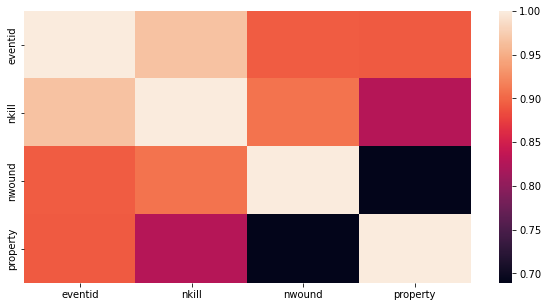

In [47]:
# heatmap for above correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(correlation_df)

# Terrorism in Middle East

Here, we present a case study of trends in terrorism in the region of Middle East and North Africa. We begin by creating a separate dataframe for this region only.

In [48]:
middle_east_df = df[df['region_txt'] == 'Middle East & North Africa']
middle_east_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
95,197002280001,1970,2,28,NaN,0,NaN,102,Jordan,10,Middle East & North Africa,Khalil,Hebron,31.530243,35.094162,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,18,Tourists,96.0,Tour Bus/Van,NaN,Tourist Bus,102.0,Jordan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic firearm,0.0,NaN,NaN,0.0,NaN,NaN,1,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
133,197003140002,1970,3,14,NaN,0,NaN,60,Egypt,10,Middle East & North Africa,Alexandria,Alexandria,31.198056,29.919167,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),NaN,United Arab Airlines Flight Antonov 24 Acft,60.0,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0.0,NaN,NaN,2.0,NaN,NaN,1,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
158,197003290002,1970,3,29,NaN,0,NaN,110,Lebanon,10,Middle East & North Africa,Beirut,Beirut,33.888523,35.503513,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Popular Front for the Liberation of Palestine (PFLP),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
195,197004150001,1970,4,15,NaN,0,NaN,102,Jordan,10,Middle East & North Africa,Amman,Amman,31.950001,35.933331,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,US Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Popular Front for the Liberation of Palestine (PFLP),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Ex

Now we group the rows according to the year of occurrence to provide the number of attacks over the years

In [49]:
middle_east_df.groupby(['iyear']).count()[['eventid']].T

iyear,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
eventid,25,52,52,19,41,44,50,209,123,449,424,302,281,324,251,133,194,202,246,464,493,609,1190,1049,590,373,545,245,314,265,359,325,304,488,881,1178,1383,1534,1357,1457,1654,2409,4560,6939,6036,6115,3780


Plotting the above table in a lineplot.

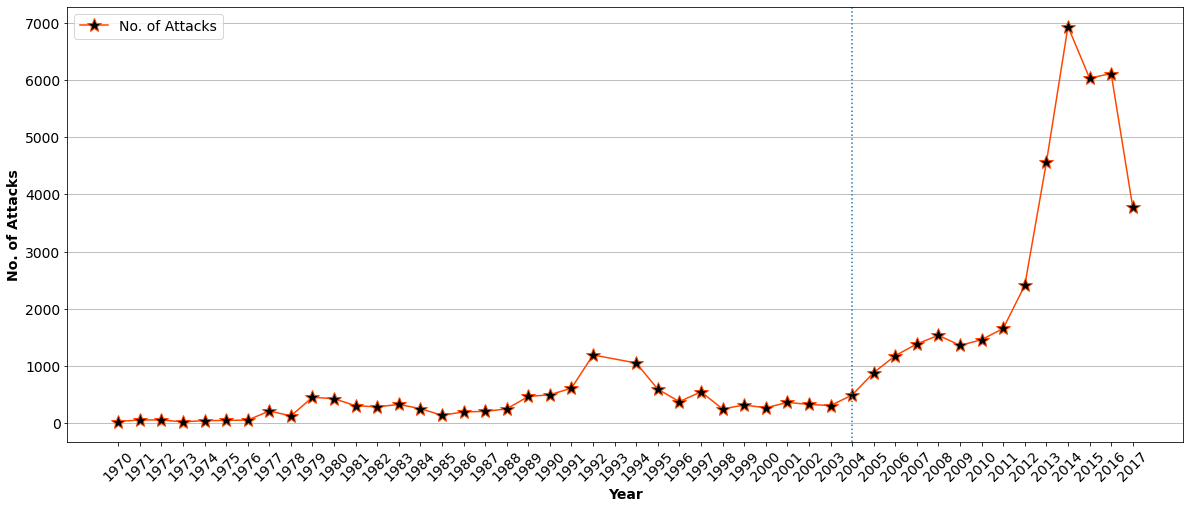

In [50]:
middle_east_df.groupby(['iyear']).count()[['eventid']].plot.line(color = 'orangered', marker = '*', mfc = 'black', ms = 15, figsize = (20,8),fontsize = 14)
# formatting the plot
plt.xlabel('Year', fontsize = 14, fontweight='bold')
plt.ylabel('No. of Attacks', fontsize = 14, fontweight='bold')
plt.legend(['No. of Attacks'], fontsize = 14)
plt.axes().set_xticks(np.arange(1970, 2018, 1))
plt.xticks(rotation=45)
plt.grid(axis = 'y')
plt.axvline(2004, linestyle = ':')
plt.show()

**INFERENCE:** Middle east region was a peaceful region compared to other regions, but things have changed since this millenium. Particularly after 2004, terrorist attacks have increased drastically.

Some of the reasons for this are the autocracy in these regions, US invasions in some countries, the Arab Spring, dominance for natural resources like oil and rise of groups with crooked ideologies.

# Terrorism in Latin America

Here, we present a case study to find trend in terrorism over the region of Latin America. Latin America constitutes of countries from South America and Central America, where languages like Spanish and Portuguese are predominantly spoken. So we bring these two regions under one name.


In [51]:
def change_region(data):
  if data == 'South America' or data == 'Central America & Caribbean':
    data = 'Latin America'
  return data
# changing the region column
df['region_txt'] = df['region_txt'].apply(lambda x: change_region(x))

Now we create a dataframe containing only those rows which belong to region of "Latin America". Also we include the country of Mexico from North America region into this dataframe. 

In [52]:
# adding the country mexico and region latin america
latin_df = df[(df['region_txt'] == 'Latin America') | (df['country_txt'] == 'Mexico')]
latin_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Latin America,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,Latin America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,0,0,1,Assassination,NaN,NaN,NaN,NaN,3,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah/Chief of Directorate of info. and intell.,218.0,Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tupamaros (Uruguay),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic firearm,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
21,197001150001,1970,1,15,NaN,0,NaN,218,Uruguay,3,Latin America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,8,Educational Institution,49.0,School/University/Educational Building,NaN,"Secondary School, Chemistry Lab",218.0,Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tupamaros (Uruguay),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic firearms,0.0,NaN,NaN,0.0,NaN,NaN,1,3.0,Minor (likely < $1 million),2500.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
25,197001200001,1970,1,20,NaN,0,NaN,83,Guatemala,2,Latin America,Guatemala,Guatemala City,14.622869,-90.529068,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,British consulate,"Bodyguard, British Consul",216.0,Great Britain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Now, we find the number of incidents occurring each year in this region.

In [53]:
# groupby function groups the rows by year of occurrence
latin_df.groupby(['iyear']).count()[['eventid']].T

iyear,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
eventid,72,29,36,92,106,65,154,156,438,818,1386,1527,1610,1779,2151,1819,1578,1832,1539,1887,1393,2055,1422,595,452,708,986,109,139,158,235,153,125,48,53,62,61,152,168,154,109,150,204,293,196,167,196


Plotting the above data as lineplot.

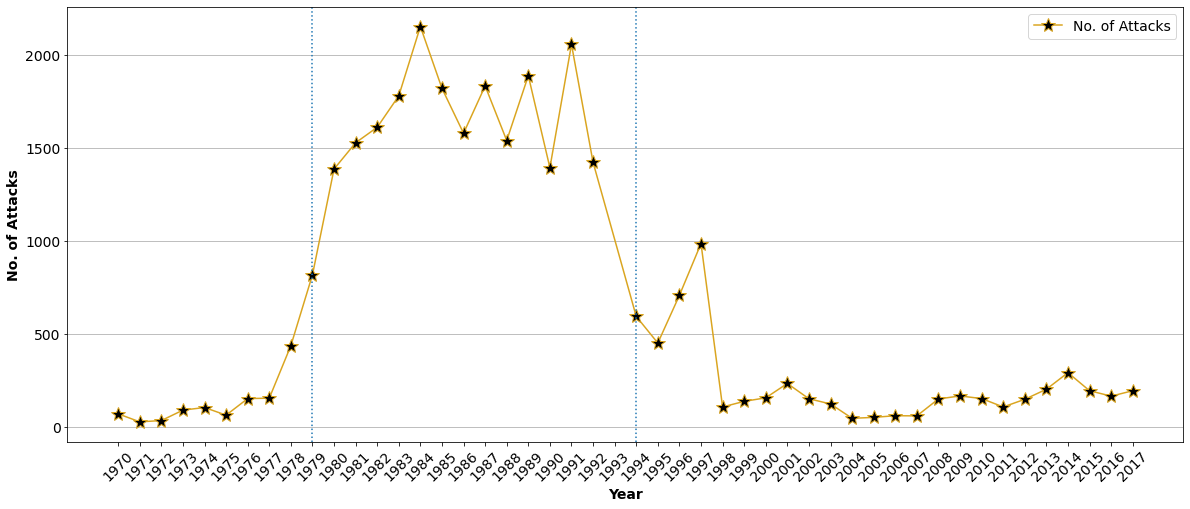

In [54]:
latin_df.groupby(['iyear']).count()[['eventid']].plot.line(color = 'goldenrod', marker = '*', mfc = 'black', ms = 15, figsize = (20,8),fontsize = 14)
# formatting the plot
plt.xlabel('Year', fontsize = 14, fontweight='bold')
plt.ylabel('No. of Attacks', fontsize = 14, fontweight='bold')
plt.legend(['No. of Attacks'], fontsize = 14)
plt.axes().set_xticks(np.arange(1970, 2018, 1))
plt.xticks(rotation=45)
plt.grid(axis = 'y')
plt.axvline(1979, linestyle = ':')
plt.axvline(1994, linestyle = ':')
plt.show()

**INFERENCE:** Terrorism was high since late 1970s to early 1990s. Attacks constantly remained above 1000. It reduced substantially in following years compared to the 1980s. This is in contrast to Middle East region where attacks have increased in later years and not in 1980s.

This hints at the operation of drug cartels, like the Medellin cartel led by Pablo Escobar, which also conducted many terrorist attacks. Further these activities were fuelled by heightened cold war in 80s which resulted in conflicts between different factions. 

# INDIA STATISTICS

We now analyze the terrorism data for our country India. So we make a separate dataframe variable containing data for country "India" only.

In [55]:
india_df = df[df['country_txt'] == 'India']
# checking indian dataframe
india_df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181663,201712300021,2017,12,30,NaN,0,NaN,92,India,6,South Asia,Kerala,Koothuparamba,11.831902,75.565432,1.0,0,The incident occurred in the Kannur district.,"12/30/2017: Assailants threw an explosive device at a police station in Koothuparamba, Kerala, India. There were no reported casualties in the bla...",1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Indian Police Service (IPS),Koothuparamba Police Station,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,"The specific motive is unknown; however, sources suspected that the attack may have been carried out in response to the arrest of Rashtriya Swayam...",0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,17.0,Other Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A crude bomb was used in the attack.,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Crude bomb explosion at two places in Kerala's Kannur, woman sustains injuries,"" Hindustan Times, December 30, 2017.","""Bomb hurled at police station in Kannur,"" The Hindu, December 30, 2017.","""India:Crude bombs hurled at Koothuparamba police station,"" OnManorama Online, December 30, 2017.",START Primary Collection,-9,-9,0,-9,NaN
181665,201712300023,2017,12,30,NaN,0,NaN,92,India,6,South Asia,Chhattisgarh,Toylanka,18.802725,81.497666,1.0,0,The incident occurred in the Dantewada district.,"12/30/2017: Assailants set fire to seven vehicles at a road construction site in Toylanka, Chhattisgarh, India. There were no reported casualties....",1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,1,Business,12.0,Construction,Unknown,Road Construction Site,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Communist Party of India - Maoist (CPI-Maoist),NaN,NaN,NaN,NaN,NaN,"The specific motive is unknown; however, sources stated that the attack was carried out in opposition to development projects in the area.",0.0,NaN,NaN,0,12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,8.0,Incendiary,18.0,Arson/Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),-99.0,Several construction vehicles were damaged in the attack.,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Maoists set ablaze seven vehicles in Dantewada,"" Worldnews EasyBranches, December 31, 2017.","""Explosives recovered in 

## Timeline of Indian attacks

Here we find out the trend of terrorist attacks over the years.

In [56]:
# grouping by years
india_timeline_df = india_df.groupby('iyear').agg({'eventid':'count', 'nkill':'sum'})
india_timeline_df['Kills per attacks'] = india_timeline_df['nkill']/kill_attack_df['eventid']
india_timeline_df.T

iyear,1972,1975,1976,1977,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
eventid,1.0,1.00000,1.0,1.0,20.000000,10.000000,16.000000,12.000000,47.000000,156.0000,39.000000,96.000000,166.00000,358.000000,323.000000,347.000000,339.000000,237.000000,107.000000,179.000000,213.000000,193.000000,61.000000,112.000000,176.000000,233.000000,182.000000,196.000000,108.000000,146.000000,165.000000,149.000000,533.000000,672.000000,659.000000,637.000000,611.000000,694.0000,860.000000,884.00000,1025.000000,966.000000
nkill,0.0,4.00000,0.0,0.0,31.000000,17.000000,24.000000,59.000000,59.000000,193.0000,51.000000,340.000000,506.00000,966.000000,874.000000,906.000000,1113.000000,1152.000000,389.000000,361.000000,569.000000,853.000000,398.000000,469.000000,665.000000,660.000000,582.000000,472.000000,334.000000,466.000000,716.000000,626.000000,823.000000,774.000000,801.000000,493.000000,264.000000,467.0000,490.000000,387.00000,467.000000,465.000000
Kills per attacks,0.0,0.00569,0.0,0.0,0.011918,0.006489,0.009419,0.023676,0.020996,0.0564,0.017604,0.119131,0.15917,0.259677,0.202362,0.233746,0.238534,0.227983,0.112688,0.117322,0.188224,0.267063,0.427957,0.339363,0.374016,0.350877,0.448382,0.371946,0.287683,0.231266,0.261696,0.193389,0.171566,0.164261,0.167258,0.098246,0.030979,0.0388,0.028989,0.02586,0.034371,0.042661


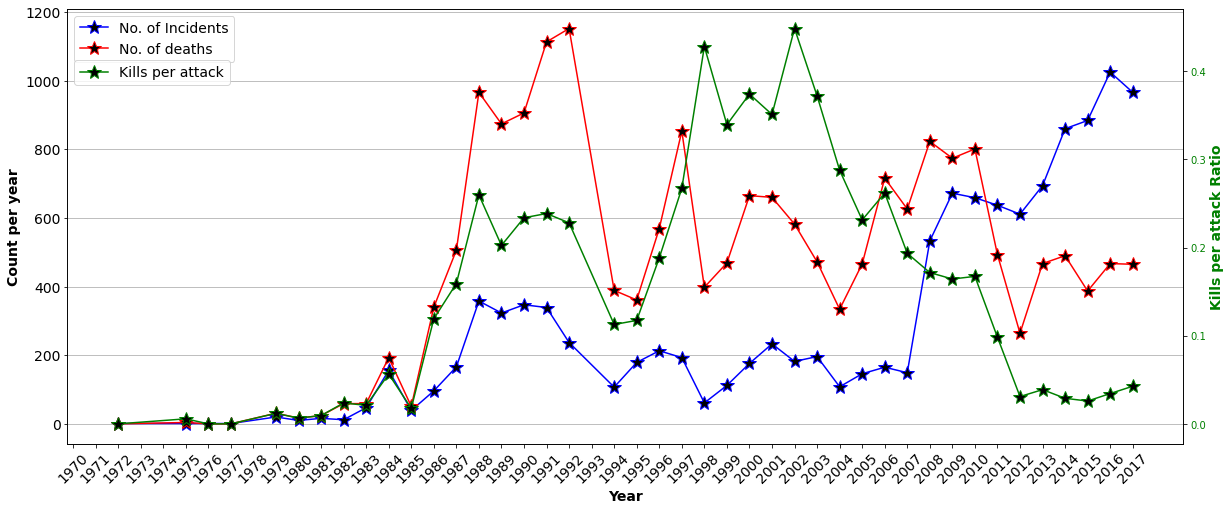

In [57]:
# lineplot
india_df.groupby(['iyear']).agg({'eventid':'count','nkill':'sum'}).plot(color={"eventid": "blue", "nkill": "red"}, figsize = (20,8),fontsize = 14,
                                                                  marker = '*', mfc = 'black', ms = 15)
# formatting the plot
plt.xlabel('Year', fontsize = 14, fontweight='bold')
plt.ylabel('Count per year', fontsize = 14, fontweight='bold')
plt.legend(['No. of Incidents','No. of deaths'], fontsize = 14, loc = 'upper left')
plt.axes().set_xticks(np.arange(1970, 2018, 1))
plt.xticks(rotation=45)
plt.grid(axis = 'y')

# twinx creates another y-axis sharing the same x-axis
ax2 = plt.axes().twinx()
ax2.set_ylabel('Kills per attack Ratio', fontsize = 14, fontweight='bold', color ='green')
ax2.plot(india_timeline_df['Kills per attacks'], color = 'green',marker = '*', mfc = 'black', ms = 15)
ax2.tick_params(axis ='y', labelcolor = 'green')
plt.legend(['Kills per attack'], fontsize = 14, loc = 'upper left', bbox_to_anchor=(0,0.898))

plt.show()

**INFERENCE:** Peace prevailed India in the 70s and till mid 80s. Since mid 80s, there has been a constant rise in terrorist attacks along with death count.
Since 2007, attacks have increased drastically. 

However, in recent times India has managed to keep death count low even though attacks have risen, which is shown by low Kills per attack ratio. This is in contrast to the times in 90s where less attacks resulted in more number of deaths and high Kills per attack ratio. 

## States with most number of attacks

We now categorize attacks in India based on states and see which state has faced most no. of terrorist attacks.

In [58]:
# grouping by province/state column and counting no. of attacks
india_df.groupby('provstate').count()[['eventid']].sort_values(by = 'eventid', ascending = False).T

provstate,Jammu and Kashmir,Assam,Manipur,Chhattisgarh,Punjab,Jharkhand,Bihar,Odisha,West Bengal,Maharashtra,Meghalaya,Andhra Pradesh,Delhi,Uttar Pradesh,Tamil Nadu,Unknown,Tripura,Nagaland,Kerala,Gujarat,Madhya Pradesh,Karnataka,Haryana,Chandigarh,Rajasthan,Mizoram,Telangana,Arunachal Pradesh,Uttaranchal,Himachal Pradesh,Goa,Sikkim,Puducherry
eventid,2449,1149,1100,977,945,885,686,647,646,302,293,291,208,201,163,156,116,115,98,84,75,71,50,47,43,27,24,24,24,24,5,4,2


We now plot the above data on bar plot.

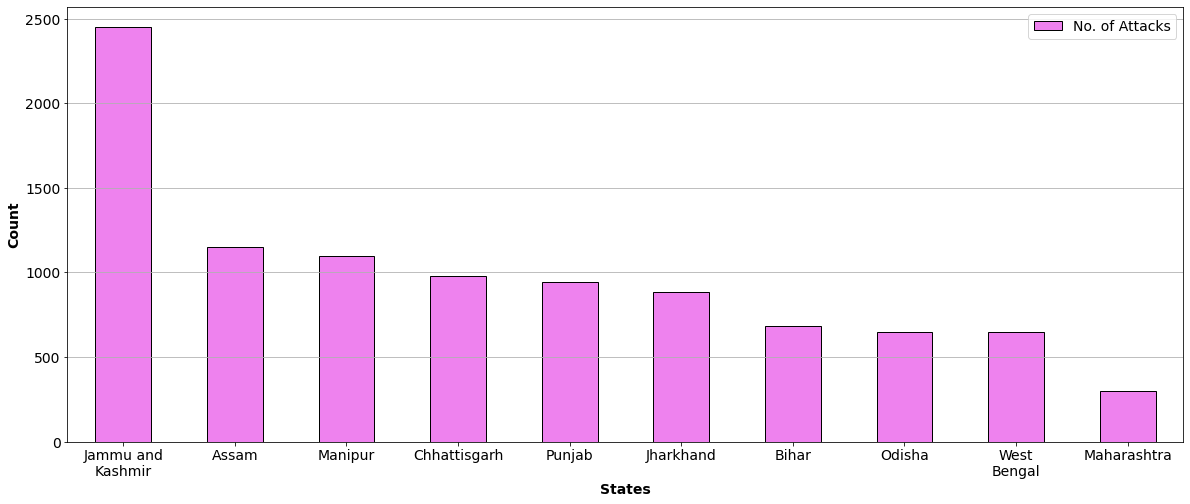

In [59]:
india_df.groupby('provstate').count()[['eventid']].sort_values(by = 'eventid', ascending = False).head(10). \
                                                                plot(kind = 'bar',figsize = (20,8),fontsize = 14, color ='violet',edgecolor='black')
# formattting the plot
plt.xlabel('States', fontsize = 14, fontweight='bold')
plt.ylabel('Count', fontsize = 14, fontweight='bold')
plt.legend(['No. of Attacks'], fontsize = 14)

wrap_labels(plt.axes(), 10)
plt.axes().figure
plt.grid(axis = 'y')
plt.show()

**INFERENCE:** Jammu and Kashmir has faced the most number of attacks than any other state in India, way ahead than the 2nd placed Assam. Manipur, Chhattisgarh and Punjab complete the top 5 with comparable numbers.

## States with most insurgencies

In the previous section, we saw Jammu and Kashmir topped the charts for most no. of attacks. The Kashmir Insurgency could be a reason for that. To check that, we plot the states with most no. of insurgency attacks.

In [60]:
#  alternative_txt column contains the data on insurgency
india_insurg_df = india_df[india_df['alternative_txt'] == 'Insurgency/Guerilla Action']

In [61]:
# grouping by states all insurgencies attacks
india_insurg_df = india_insurg_df.groupby(['provstate']).count()[['eventid']].sort_values(by = 'eventid', ascending = False)
india_insurg_df.drop(labels='Unknown',inplace = True)

In [62]:
# printing top 7 states and combining rest states as 'Others' label
not_top9 = india_insurg_df[7:]
not_top9.index = ['Others']*len(not_top9)
not_top9.index.name = 'provstate'
not_top9 = not_top9.groupby('provstate').sum()
# concat top 7 and others dataframe
india_insurg_df = pd.concat([india_insurg_df.head(7), not_top9])
india_insurg_df.T

provstate,Jammu and Kashmir,Manipur,Chhattisgarh,Assam,Punjab,Nagaland,Odisha,Others
eventid,325,121,58,37,34,19,17,61


Converting the above table into a pie chart.

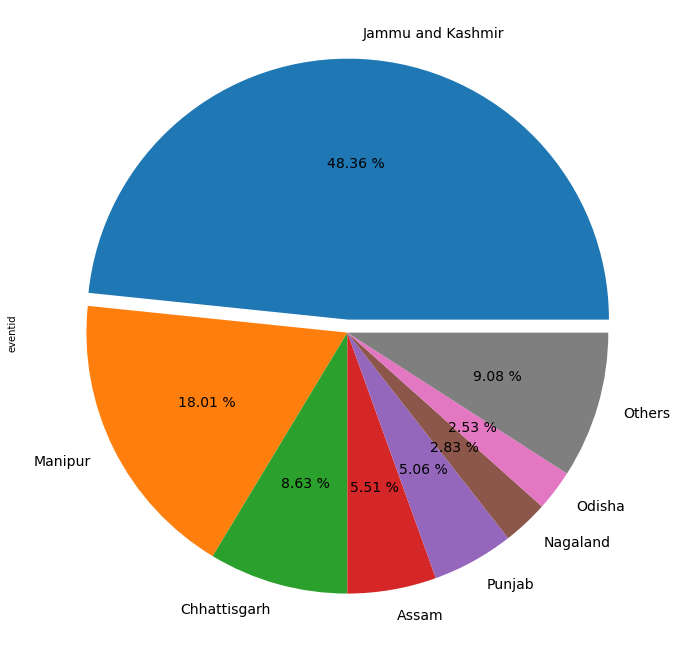

In [63]:
india_insurg_df.plot(kind='pie', y='eventid',figsize = (20,12),fontsize = 14, autopct='%.2f %%', explode = [0.05,0,0,0,0,0,0,0])

plt.axes().get_legend().set_visible(False)

**INFERENCE:** Jammu and Kashmir has indeed faced most no. of insurgency attacks, almost half in the country and more than twice than 2nd placed Manipur. One thing to notice is the top 5 states here were also present in the top 5 of most no. of attacks, meaning most of the terrorist attacks in the country are part of some insurgency.

## Jammu and Kashmir terrorism timeline

In both the previous sections, Jammu and Kashmir topped the list. In this section, we plot the timeline of Terrorist attacks in Jammu and Kashmir and find since when and how the attacks have happenned over the years.

In [64]:
# dataframe contains data for state Jammu and Kashmir
jk_df = india_df[india_df['provstate'] == 'Jammu and Kashmir']
jk_df.groupby('iyear').agg({'eventid':'count', 'nkill':'sum'}).T

iyear,1984,1986,1988,1989,1990,1991,1992,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
eventid,2.0,1.0,16.0,54.0,148.0,58.0,68.0,34.0,107.0,92.0,62.0,18.0,50.0,82.0,168.0,129.0,120.0,73.0,89.0,77.0,36.0,52.0,24.0,12.0,38.0,66.0,78.0,125.0,109.0,204.0,257.0
nkill,3.0,1.0,36.0,37.0,194.0,114.0,168.0,102.0,143.0,143.0,158.0,175.0,215.0,285.0,440.0,382.0,228.0,201.0,201.0,154.0,54.0,49.0,21.0,5.0,17.0,24.0,89.0,92.0,67.0,126.0,144.0


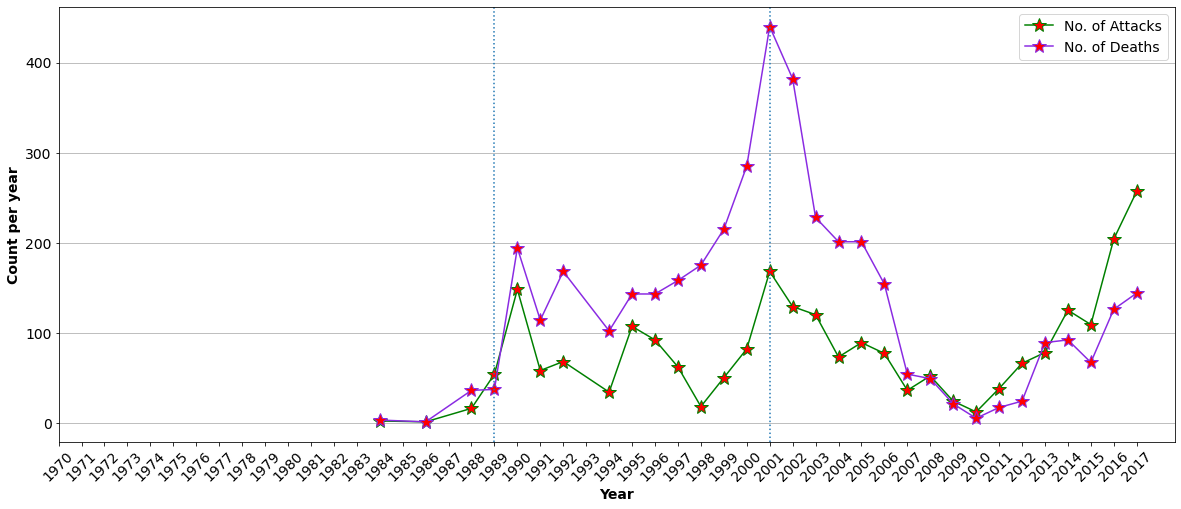

In [65]:
jk_df.groupby('iyear').agg({'eventid':'count', 'nkill':'sum'}).plot(figsize = (20,8),fontsize = 14, color={"eventid": "g", "nkill": "blueviolet"},\
                                                                    marker = '*', mfc = 'r', ms = 15)
# formatting the plot
plt.xlabel('Year', fontsize = 14, fontweight='bold')
plt.ylabel('Count per year', fontsize = 14, fontweight='bold')
plt.legend(['No. of Attacks','No. of Deaths'], fontsize = 14)
plt.axes().set_xticks(np.arange(1970, 2018, 1))
plt.xticks(rotation=45)
plt.axvline(1989, linestyle = ':')
plt.axvline(2001, linestyle = ':')
plt.grid(axis = 'y')
plt.show()

Jammu and Kashmir was peaceful till the late 80s. Since 1989, which marks the beginning of the Kashmir Insurgency, it has witnessed high amounts of attacks resulting in high death rate. Violence peaked in 2001. Period between 2007 to 2012 saw a relatively lower attacks, however it has been on the rise ever since then.

## Deadliest type of attacks in India

In this section, we present the information on type of attack used by terrorists in India. 

In [66]:
# grouping india data by attack_type and finding kill count
india_df.groupby('attacktype1_txt').sum()[['nkill']].sort_values(by = 'nkill', ascending = False).head(10).drop(labels='Unknown').T

attacktype1_txt,Armed Assault,Bombing/Explosion,Assassination,Hostage Taking (Kidnapping),Hostage Taking (Barricade Incident),Facility/Infrastructure Attack,Hijacking,Unarmed Assault
nkill,9352.0,5827.0,1998.0,806.0,136.0,135.0,41.0,28.0


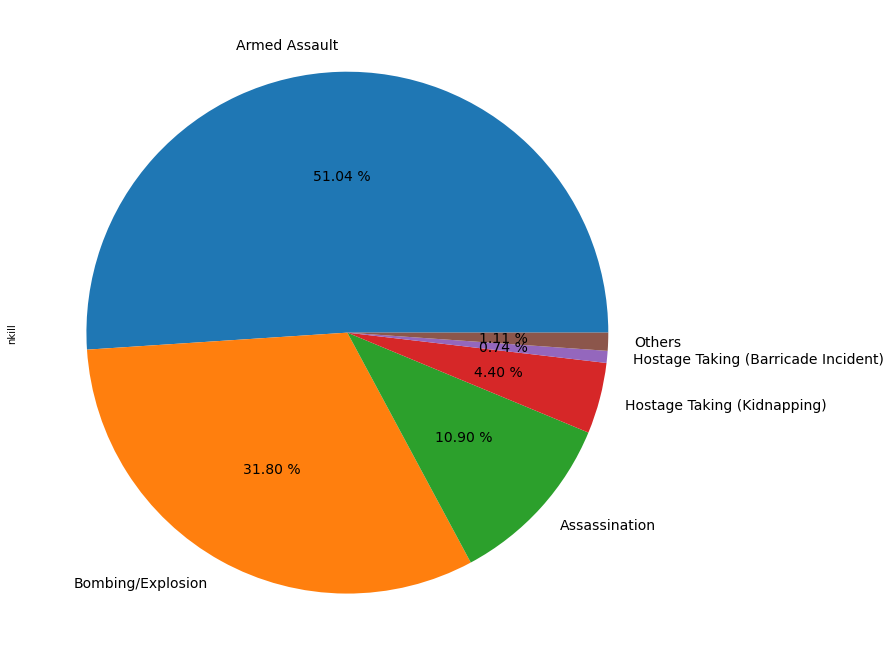

In [67]:
india_attack_df = india_df.groupby('attacktype1_txt').sum()[['nkill']].sort_values(by = 'nkill', ascending = False).drop(labels='Unknown')

# separating top 5 and keeping rest as others
not_top9 = india_attack_df[5:]
not_top9.index = ['Others']*len(not_top9)
not_top9.index.name = 'attacktype1_txt'
not_top9 = not_top9.groupby('attacktype1_txt').sum()
india_attack_df = pd.concat([india_attack_df.head(5), not_top9])
# plotting the pie chart
india_attack_df.plot(kind='pie', y='nkill',figsize = (20,12),fontsize = 14, autopct='%.2f %%')                                                       
plt.axes().get_legend().set_visible(False)

**INFERENCE:** Armed Assault has taken more than half of lives followed by Bombing/Explosion meaning these are the preferred methods by the terrorist.

## Terrorists' Targets in India

Here, we find out what were the top targets for the terrorists.

In [68]:
india_df.groupby('targtype1_txt').count()[['eventid']].sort_values(by = 'eventid', ascending = False).head(10).drop(labels='Unknown').T

targtype1_txt,Private Citizens & Property,Police,Government (General),Business,Military,Transportation,Educational Institution,Violent Political Party,Religious Figures/Institutions
eventid,3128,2298,1725,1129,916,829,296,233,214


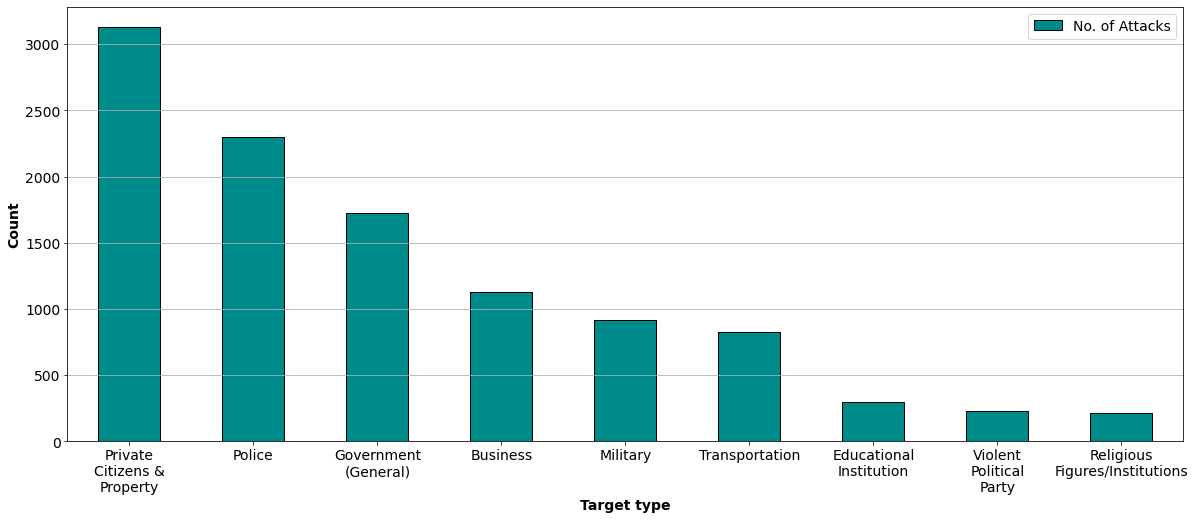

In [69]:
india_df.groupby('targtype1_txt').count()[['eventid']].sort_values(by = 'eventid', ascending = False).head(10).drop(labels='Unknown'). \
                                                                     plot(kind = 'bar',figsize = (20,8),fontsize = 14, color ='darkcyan',edgecolor='black')

plt.xlabel('Target type', fontsize = 14, fontweight='bold')
plt.ylabel('Count', fontsize = 14, fontweight='bold')
plt.legend(['No. of Attacks'], fontsize = 14)

wrap_labels(plt.axes(), 10)
plt.axes().figure
plt.grid(axis = 'y')
plt.show()

**INFERENCE:** Terrorists have attacked Private Citizens and Property most no. of times. They also have targetted the Police and Government properties.

## Terrorist Organizations with most number of attacks

Here, we see which terrorist organizations have performed most number of attacks in India.

In [70]:
# grouping by terrorist group name and counting the no. of attacks
india_df.groupby('gname').count()[['eventid']].sort_values(by = 'eventid', ascending = False).drop(labels = 'Unknown').T

gname,Communist Party of India - Maoist (CPI-Maoist),Maoists,Sikh Extremists,United Liberation Front of Assam (ULFA),Hizbul Mujahideen (HM),Lashkar-e-Taiba (LeT),National Democratic Front of Bodoland (NDFB),Garo National Liberation Army,Muslim Separatists,People's War Group (PWG),National Socialist Council of Nagaland-Isak-Muivah (NSCN-IM),People's Liberation Army (India),Muslim Militants,Bodo Militants,National Liberation Front of Tripura (NLFT),Separatists,Kashmiri extremists,People's Liberation Front of India,Gorkha Janmukti Morcha (GJM),Naxalites,Gurkha National Liberation Front (GNLF),National Socialist Council of Nagaland-Khaplang (NSCN-K),Jammu and Kashmir Liberation Front,Indian Mujahideen,Dishmish Regiment,Kangleipak Communist Party (KCP),Muslim extremists,Jaish-e-Mohammad (JeM),Maoist Communist Center (MCC),People's Revolutionary Party of Kangleipak (PREPAK),United National Liberation Front (UNLF),Tripura National Volunteers (TNV),Militants,Khalistan Liberation Force,Dima Halao Daoga (DHD),Tribal Group,People's Committee against Police Atrocities (PCPA),Terrorists,Coordination Committee (CORCOM),Karbi People's Liberation Tigers (KPLT),Hindu extremists,Khalistan Commando Force,Achik Songna An'pachakgipa Kotok (ASAK),Zeliangrong United Front,National Socialist Council of Nagaland,Tritiya Prastuti Committee (TPC),Al-Ummah,Al-Mansoorian,Students Islamic Movement of India (SIMI),Karbi Longri North Cachar Liberation Front (KLNLF),Kamtapur Liberation Organization (KLO),Naga People,All Tripura Tiger Force (ATTF),Kuki National Front (KNF),Mizo National Front,Tehrik al-Mojahedin,Lashkar-e-Islam (India),Black Widows,Jamiat ul-Mujahedin (JuM),Vishwa Hindu Parishad (VHP),Khasi Students Union,Harkat ul Ansar,United Democratic Liberation Army (UDLA),Babbar Khalsa International (BKI),Al-Umar Mujahideen,Manipur Naga People's Army (MNPA),Gunmen,...,Tribal Revolutionary Army (TRA),Anti-Socials,Liberation of Achik Elite Force (LAEF),Rebels,Saffron Tigers,Muslim United Liberation Tigers of Assam (MULTA),Jamaat-E-Islami (India/Pakistan),National Santhali Liberation Army (NSLA),National Revolutionary Front of Manipur (NRFM),National People's Party (Rashtriya Janata Dal - RJD),Japanese Red Army (JRA),Jarnail Khalsa,National Liberation Council of Taniland,Jatav Caste,Jharkhand Bachao Aandolan,Jharkhand Kranti Raksha Dal (Utari Chotanagpur),Naga People's Council (NPC),Justice and Liberty Warriors,Karamyit Singh,Karbi Tribe,Jai Shri Ram Hindu Bhai Group,Karnataka State Farmers Association,Kashmir Freedom Force,Kisar Liberation Movement,Kuki Independent Organization (KIO/KIA),Kuki Unification Frontal Organization (KUFO),Achik Matgrik Army (AMA),Minority Unity Forum,Lama Group,Meitei extremists,Mazdoor Kisan Sangram Samiti (MKSS),Maoist Farm Laborers Struggle Committee (MXSS),Lashkari-e-Adam (Army of Adam),Liberal Democratic Council for Missing Land,Jama'atul Mujahideen Bangladesh (JMB),Islamic Fateh,Communist Trade Union Workers,Popular Front of India,Dashmesh Regiment,Right-wing extremists,Revolutionary Organization of Socialist Muslims,Revolutionary Communist Centre (RCC),Manipur Nationalist Revolutionary Party (MNRP),Dima Hasao National Army,Rajput extremists,Rabha National Security Force,Quit Kashmir Movement (QKM),Puratchi Puligal,Dissident,Praveen Dalam,Porattom,Political Group,National Socialist Council of Nagaland-Unification (NSCN-U),Dukhta-ran-e-Millat,Fedayeen Khalq (People's Commandos),Indian Tigers,Indigenous People's Front of Tripura (IPFT),Party Unity,Panthic Committee,Palestinians,Pakistani trained terrorists,Pahadi Cheetah,Organized Crime,Organization of Arab Fedayeen Cells,Nikhil Bharat Bangali Udbastu Samannay Samiti (NBBUSS),New People's Army (NPA),Laiq Chanio Group of Dacoit Bandits
eventid,1869,1393,706,357,198,187,173,166,118,97,89,88,87,87,78,77,77,67,67,66,59,57,53,52,43,39,37,33,33,30,29,29,28,24,24,23,22,21,21,20,19,19,18,17,17,17,16,16,16,15,15,15,14,14,14,13,13,12,12,12,12,11,11,11,11,10,10,...,1,1,1,1,1,1,1,1,1,1,1

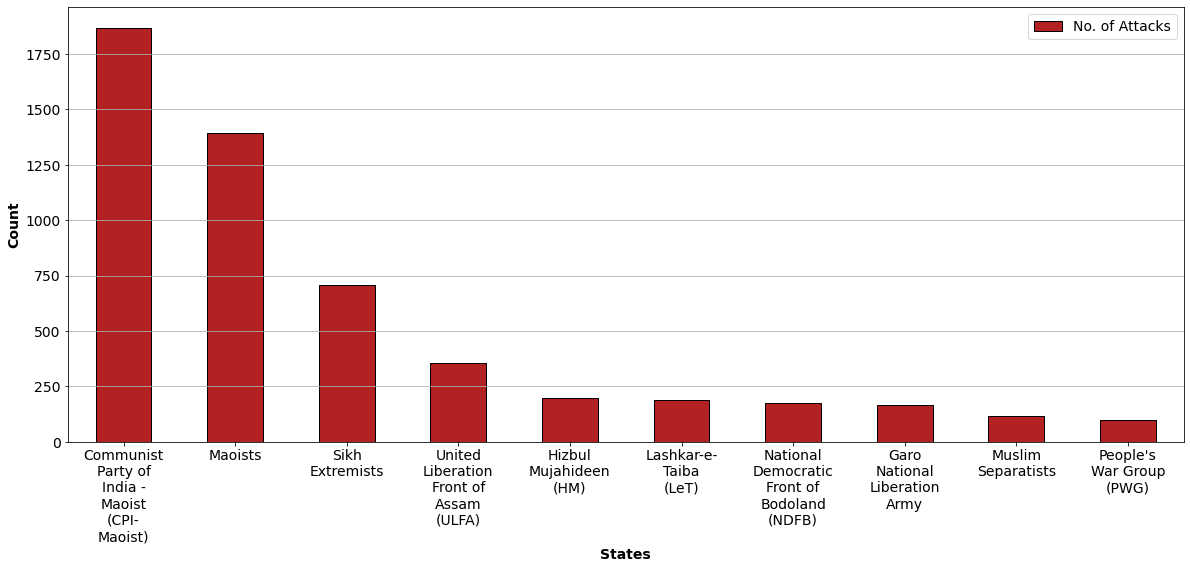

In [71]:
india_df.groupby('gname').count()[['eventid']].sort_values(by = 'eventid', ascending = False).drop(labels = 'Unknown').head(10). \
                                                    plot(kind = 'bar',figsize = (20,8),fontsize = 14, color ='firebrick',edgecolor='black')

# formatting the bar plot
plt.xlabel('States', fontsize = 14, fontweight='bold')
plt.ylabel('Count', fontsize = 14, fontweight='bold')
plt.legend(['No. of Attacks'], fontsize = 14)
plt.grid(axis = 'y')
wrap_labels(plt.axes(), 10)
plt.axes().figure
plt.show()

**INFERENCE:** The philosophy of Maoism has made a strong footprint in India through terrorism, as evident in above graph where the top 2 groups follow Maoism. If all Maoism groups are combined, they have conducted most no. of attacks in India than any other group.

## Indian states affected by Maoism

Here, we see in which states, the groups that follow the principles of Maoism, have operated.

In [72]:
# checking all terrorist groups in India to find groups following Maoism 
india_df['gname'].unique()

array(['Palestinians', 'Ananda Marga', 'Unknown',
       'Japanese Red Army (JRA)', 'Naga People', 'Meitei extremists',
       'Mizo National Front', 'Muslims', 'Naxalites',
       "People's Liberation Army (India)", 'Maoists',
       'Anti-Immigrant extremists', 'Insurgents', 'Extremists',
       'Dissident', 'Sikh Extremists', 'Secessionists', 'Iranians',
       'All India Sikh Students Federation (AISSF)',
       "Fedayeen Khalq (People's Commandos)",
       'Tripura National Volunteers (TNV)', 'Tripura Nationalists',
       'Dishmish Regiment',
       'Revolutionary Organization of Socialist Muslims',
       'National Socialist Council of Nagaland', 'Akali Dal Party',
       'Jarnail Khalsa', 'Saffron Tigers', 'Kisar Liberation Movement',
       'Tribal Separatists', 'Karamyit Singh',
       'Maoist Communist Center (MCC)', 'Terrorists', 'Separatists',
       'Khalistan Liberation Force', 'Anti-Socials', 'Gunmen', 'Tamils',
       'Khalistan Commando Force', 'Scooter Borne terroris

In [73]:
# From the above result we make a list of all groups following Maoism
mao_groups = ['Naxalites','Communist Party of India - Maoist (CPI-Maoist)','Maoists','Maoist Communist Center (MCC)','Communist Party of India',\
              'Communist Party of India- Marxist','Communist Trade Union Workers','Maoist Farm Laborers Struggle Committee (MXSS)',\
              'Communist Party of India- Marxist-Leninist','Maoist Communist Party of Manipur']
# making dataframe of only Maoism groups
india_mao_df = india_df[india_df['gname'].isin(mao_groups)]
india_mao_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
9213,197909080001,1979,9,8,NaN,0,NaN,92,India,6,South Asia,Tamil Nadu,Chennai,13.082680,80.270718,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,19,Transportation,99.0,Bus (excluding tourists),NaN,Bus,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Naxalites,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,3.0,NaN,NaN,0.0,NaN,NaN,1,3.0,Minor (likely < $1 million),30000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
9809,197912120004,1979,12,12,NaN,0,NaN,92,India,6,South Asia,Manipur,Unknown,24.663717,93.906269,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,2,Government (General),15.0,Politician or Political Party Movement/Meeting/Rally,Legislative Assembly of India,"Ranbi Singh, Speaker of Legislative Assembly",92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maoists,Separatist Guerrillas,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
9878,197912200009,1979,12,20,NaN,0,NaN,92,India,6,South Asia,Bihar,Unknown,25.096074,85.313119,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Police,Post,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Naxalites,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,5.0,Firearms,4.0,Rifle/Shotgun (non-automatic),5.0,Firearms,3.0,Handgun,NaN,NaN,NaN,NaN,Automatic firearm; Rifle; Pistol,3.0,NaN,NaN,1.0,NaN,NaN,1,4.0,Unknown,NaN,"Damages: extent of damage unknown, stole 7 rifles and ammunition (police post)",0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
9918,198001010005,1980,1,1,NaN,0,NaN,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,2,Government (General),15.0,Politician or Political Party Movement/Meeting/Rally,I.C.P.,Communist Politician,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maoists,Separatist Guerrillas,NaN,NaN,NaN,N

In [74]:
india_mao_df = india_mao_df.groupby('provstate').count()[['eventid']].sort_values(by = 'eventid', ascending = False).drop(labels = 'Unknown')
# separating top 7 states and combining rest as others
not_top9 = india_mao_df[7:]
not_top9.index = ['Others']*len(not_top9)
not_top9.index.name = 'provstate'
not_top9 = not_top9.groupby('provstate').sum()
india_mao_df_new = pd.concat([india_mao_df.head(7), not_top9])
india_mao_df_new.T

provstate,Chhattisgarh,Jharkhand,Odisha,Bihar,West Bengal,Maharashtra,Andhra Pradesh,Others
eventid,897,696,558,490,300,182,157,95


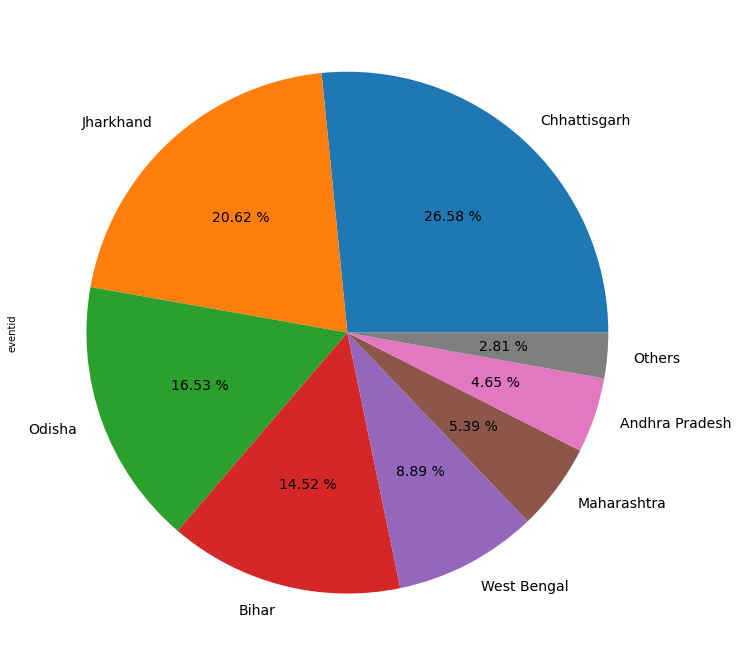

In [75]:
india_mao_df_new.plot(kind='pie', y='eventid',figsize = (20,12),fontsize = 14, autopct='%.2f %%')

plt.axes().get_legend().set_visible(False)

**INFERENCE:** The Eastern part of India is the hotbed for Maoism, which consists of the top 5 states from above chart namely Chhattisgarh, Jharkhand, Odisha, Bihar and West Bengal. Almost 90% of Maoist activities have taken place in these states. Conditions like under-development and more forest cover could be the reason favouring the Maoists.

# Summary

It was a challenge to take up the Global Terrorism database project because of the huge amount of data it had, but we took it as more data meant more analysis. Doing analysis on 135 columns was hard, particularly when columns were not named properly. However, by checking the contents, it was possible to know which column stood for what.

At first, I observed many inconsistencies in the dataset, like Year and Month having value zero, binary variables having value -99, 'Odisha' and 'Orissa' as separate states. Further many 'Nan' and 'Unknown' values were present. So I cleaned the dirty data. As I proceeded, I came across the columns of Regions/Continents, Countries, Year and Terrorist group's name. So I used the year column to give a timeline of attacks and used line-plot to show it graphically. The regions and countries were used to show the distribution of attacks over the world. Using the inbuilt geopandas map, I also showed the distribution across countries on the world map. Then I analysed the terrorist groups which had most attacks and had taken most lives. I found 4 most violent terrorist groups and for those, I showed on the world map in which area they operated and also their timeline over the years. Working with no. of attacks and No. of killed got me curious if if they had any correlation. So I found correlation between these and also included no. of wounded and property damaged.
Then I filtered the data based on country column selecting 'India'. I found the most active terrorist groups in India and 2 groups that follow the philosophy of Maoism came on top. So I made pie chart to show in which states the Maoist groups were most active and have conducted most attacks.

## Conclusions



1.   Before 2000s, global terrorist activities remained comparatively lower than period after 2000s which reached peak in 2014. Although since then, drop in terrorist activities is seen but still it is higher than any other time period. Kills per attacks ratio which were at high during late 90s and early 2000s has reduced after 2007. 1970s were the most peaceful period.
2.   Regions of Asia and Middle East & North Africa saw most no. of terrorist activities. Australasia & Oceania is the most peaceful region. Iraq saw the most attacks as a country.
3.   Terrorist organizations of Islamic State of Iraq and the Levant (ISIL) and Taliban have conducted most no. of terrorist activities. Boko Haram has the highest Kills per attack ratio.
4.   Iraq tops the list of countries with most insurgency attacks.
5.   Regions of Middle East & North Africa and Latin America had a contrasting trend in terrorism where Latin America had most of the terrorism in 1980s and early 1990s which subdued later, Middle East & North Africa saw the rise in terrorism mainly after 2000.
6.   Terrorism in India increased after mid 1980s. Since 2007, attacks have increased drastically. However, India has managed to keep the death count low in recent times compared to period before 2007.
7.   Jammu & Kashmir has seen the most no. of terrorist attacks and most no. of insurgency attacks among the Indian states, particularly after 1989.
8.   Armed Assault and Bombing/Explosion are the types of attacks that have taken most lives globally and also in India.
9.   Maoist groups have had the most no. of terrorist attacks in India. They have operated mostly in Eastern states of Chhattisgarh, Jharkhand, Odisha and Bihar.




